# Проектная работа по модулю EDA

В файлах представлена информация по 10 европейским городам: отдельно по будним и выходным дням.

Наблюдения в датасете — объекты размещения на airbnb.

Для каждого объекта указаны переменные:
- realSum — Стоимость размещения за сутки (Numeric)
- room_type — Тип комнаты или номера (Categorical)
- room_shared — Есть комнаты совместного проживания (Boolean)
- room_private — Есть частные комнаты (Boolean)
- person_capacity — Максимальное кол-во постояльцев (Numeric)
- host_is_superhost — Суперхост ли хозяин (Boolean)
- multi — У хоста от 2 до 4 предложений на airbnb (Boolean)
- biz — У хоста более 4 предложений на airbnb (Boolean)
- cleanliness_rating — Рейтинг чистоты (Numeric)
- guest_satisfaction_overall — Общий рейтинг (Numeric)
- bedrooms — Количество спален (Numeric)
- dist — Расстояние от центра города (Numeric)
- metro_dist — Расстояние до ближайшей станции метро (Numeric)
- lng — Долгота (Numeric)
- lat — Широта (Numeric)
- attr_index — индекс привлекательности района (Numeric)
- attr_index_norm — нормализованный на интервал [0, 100] индекс привлекательности района (Numeric)
- rest_index — индекс ресторанов в районе объекта (Numeric)
- rest_index_norm — нормализованный на интервал [0, 100] индекс ресторанов в районе объекта (Numeric)

Задача: понять что-то важное о сервисе airbnb и/или этих городах с точки зрения одной из ролей: клиент / владелец жилья, сдающий его аренду / инвестор в гостиничный бизнес / <придумайте свой вариант>.

In [1]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import phik
import itertools
from phik import resources
from phik.binning import bin_data
from phik.report import plot_correlation_matrix
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Путь к папке с файлами
file_path = '../datasets/*.csv'  

all_dataframes = []

for filename in glob.glob(file_path):
    df = pd.read_csv(filename)
    city = filename.split('datasets\\')[-1].split('_')[0]
    day_type = filename.split('/')[-1].split('_')[1].split('.')[0]
    df['City'] = city
    df['Day_type'] = day_type
    all_dataframes.append(df)

final_df = pd.concat(all_dataframes, ignore_index=True)

In [3]:
final_df

Unnamed: 0     realSum        room_type  room_shared  room_private  \
0               0  194.033698     Private room        False          True   
1               1  344.245776     Private room        False          True   
2               2  264.101422     Private room        False          True   
3               3  433.529398     Private room        False          True   
4               4  485.552926     Private room        False          True   
...           ...         ...              ...          ...           ...   
51702        1794  715.938574  Entire home/apt        False         False   
51703        1795  304.793960  Entire home/apt        False         False   
51704        1796  637.168969  Entire home/apt        False         False   
51705        1797  301.054157     Private room        False          True   
51706        1798  133.230489     Private room        False          True   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                  2.0              False      1    0                10.0   
1                  4.0              False      0    0                 8.0   
2                  2.0              False      0    1                 9.0   
3                  4.0              False      0    1                 9.0   
4                  2.0               True      0    0                10.0   
...                ...                ...    ...  ...                 ...   
51702              6.0              False      0    1                10.0   
51703              2.0              False      0    0                 8.0   
51704              2.0              False      0    0                10.0   
51705              2.0              False      0    0                10.0   
51706              4.0               True      1    0                10.0   

       ...      dist  metro_dist  attr_index  attr_index_norm  rest_index  \
0      ...  5.022964    2.539380   78.690379         4.166708   98.253896   
1      ...  0.488389    0.239404  631.176378        33.421209  837.280757   
2      ...  5.748312    3.651621   75.275877         3.985908   95.386955   
3      ...  0.384862    0.439876  493.272534        26.119108  875.033098   
4      ...  0.544738    0.318693  552.830324        29.272733  815.305740   
...    ...       ...         ...         ...              ...         ...   
51702  ...  0.530181    0.135447  219.402478        15.712158  438.756874   
51703  ...  0.810205    0.100839  204.970121        14.678608  342.182813   
51704  ...  0.994051    0.202539  169.073402        12.107921  282.296424   
51705  ...  3.044100    0.287435  109.236574         7.822803  158.563398   
51706  ...  1.263932    0.480903  150.450381        10.774264  225.247293   

       rest_index_norm       lng       lat       City  Day_type  
0             6.846473   4.90569  52.41772  amsterdam  weekdays  
1            58.342928   4.90005  52.37432  amsterdam  weekdays  
2             6.646700   4.97512  52.36103  amsterdam  weekdays  
3            60.973565   4.89417  52.37663  amsterdam  weekdays  
4            56.811677   4.90051  52.37508  amsterdam  weekdays  
...                ...       ...       ...        ...       ...  
51702        10.604584  16.37940  48.21136     vienna  weekends  
51703         8.270427  16.38070  48.20296     vienna  weekends  
51704         6.822996  16.38568  48.20460     vienna  weekends  
51705         3.832416  16.34100  48.19200     vienna  weekends  
51706         5.444140  16.39066  48.20811     vienna  weekends  

[51707 rows x 22 columns]

In [4]:
final_df.describe()

Unnamed: 0       realSum  person_capacity         multi  \
count  51707.000000  51707.000000     51707.000000  51707.000000   
mean    1620.502388    279.879591         3.161661      0.291353   
std     1217.380366    327.948386         1.298545      0.454390   
min        0.000000     34.779339         2.000000      0.000000   
25%      646.000000    148.752174         2.000000      0.000000   
50%     1334.000000    211.343089         3.000000      0.000000   
75%     2382.000000    319.694287         4.000000      1.000000   
max     5378.000000  18545.450285         6.000000      1.000000   

                biz  cleanliness_rating  guest_satisfaction_overall  \
count  51707.000000        51707.000000                51707.000000   
mean       0.350204            9.390624                   92.628232   
std        0.477038            0.954868                    8.945531   
min        0.000000            2.000000                   20.000000   
25%        0.000000            9.000000                   90.000000   
50%        0.000000           10.000000                   95.000000   
75%        1.000000           10.000000                   99.000000   
max        1.000000           10.000000                  100.000000   

          bedrooms          dist    metro_dist    attr_index  attr_index_norm  \
count  51707.00000  51707.000000  51707.000000  51707.000000     51707.000000   
mean       1.15876      3.191285      0.681540    294.204105        13.423792   
std        0.62741      2.393803      0.858023    224.754123         9.807985   
min        0.00000      0.015045      0.002301     15.152201         0.926301   
25%        1.00000      1.453142      0.248480    136.797385         6.380926   
50%        1.00000      2.613538      0.413269    234.331748        11.468305   
75%        1.00000      4.263077      0.737840    385.756381        17.415082   
max       10.00000     25.284557     14.273577   4513.563486       100.000000   

         rest_index  rest_index_norm           lng           lat  
count  51707.000000     51707.000000  51707.000000  51707.000000  
mean     626.856696        22.786177      7.426068     45.671128  
std      497.920226        17.804096      9.799725      5.249263  
min       19.576924         0.592757     -9.226340     37.953000  
25%      250.854114         8.751480     -0.072500     41.399510  
50%      522.052783        17.542238      4.873000     47.506690  
75%      832.628988        32.964603     13.518825     51.471885  
max     6696.156772       100.000000     23.786020     52.641410

In [5]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

In [6]:
final_df.isnull().sum()

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
City                          0
Day_type                      0
dtype: int64

In [7]:
final_df.drop (labels = 'Unnamed: 0', axis= 1 , inplace= True )
final_df

realSum        room_type  room_shared  room_private  \
0      194.033698     Private room        False          True   
1      344.245776     Private room        False          True   
2      264.101422     Private room        False          True   
3      433.529398     Private room        False          True   
4      485.552926     Private room        False          True   
...           ...              ...          ...           ...   
51702  715.938574  Entire home/apt        False         False   
51703  304.793960  Entire home/apt        False         False   
51704  637.168969  Entire home/apt        False         False   
51705  301.054157     Private room        False          True   
51706  133.230489     Private room        False          True   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                  2.0              False      1    0                10.0   
1                  4.0              False      0    0                 8.0   
2                  2.0              False      0    1                 9.0   
3                  4.0              False      0    1                 9.0   
4                  2.0               True      0    0                10.0   
...                ...                ...    ...  ...                 ...   
51702              6.0              False      0    1                10.0   
51703              2.0              False      0    0                 8.0   
51704              2.0              False      0    0                10.0   
51705              2.0              False      0    0                10.0   
51706              4.0               True      1    0                10.0   

       guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                            93.0  ...  5.022964    2.539380   78.690379   
1                            85.0  ...  0.488389    0.239404  631.176378   
2                            87.0  ...  5.748312    3.651621   75.275877   
3                            90.0  ...  0.384862    0.439876  493.272534   
4                            98.0  ...  0.544738    0.318693  552.830324   
...                           ...  ...       ...         ...         ...   
51702                       100.0  ...  0.530181    0.135447  219.402478   
51703                        86.0  ...  0.810205    0.100839  204.970121   
51704                        93.0  ...  0.994051    0.202539  169.073402   
51705                        87.0  ...  3.044100    0.287435  109.236574   
51706                        93.0  ...  1.263932    0.480903  150.450381   

       attr_index_norm  rest_index  rest_index_norm       lng       lat  \
0             4.166708   98.253896         6.846473   4.90569  52.41772   
1            33.421209  837.280757        58.342928   4.90005  52.37432   
2             3.985908   95.386955         6.646700   4.97512  52.36103   
3            26.119108  875.033098        60.973565   4.89417  52.37663   
4            29.272733  815.305740        56.811677   4.90051  52.37508   
...                ...         ...              ...       ...       ...   
51702        15.712158  438.756874        10.604584  16.37940  48.21136   
51703        14.678608  342.182813         8.270427  16.38070  48.20296   
51704        12.107921  282.296424         6.822996  16.38568  48.20460   
51705         7.822803  158.563398         3.832416  16.34100  48.19200   
51706        10.774264  225.247293         5.444140  16.39066  48.20811   

            City  Day_type  
0      amsterdam  weekdays  
1      amsterdam  weekdays  
2      amsterdam  weekdays  
3      amsterdam  weekdays  
4      amsterdam  weekdays  
...          ...       ...  
51702     vienna  weekends  
51703     vienna  weekends  
51704     vienna  weekends  
51705     vienna  weekends  
51706     vienna  weekends  

[51707 rows x 21 columns]

In [8]:
final_df.drop_duplicates()

realSum        room_type  room_shared  room_private  \
0      194.033698     Private room        False          True   
1      344.245776     Private room        False          True   
2      264.101422     Private room        False          True   
3      433.529398     Private room        False          True   
4      485.552926     Private room        False          True   
...           ...              ...          ...           ...   
51702  715.938574  Entire home/apt        False         False   
51703  304.793960  Entire home/apt        False         False   
51704  637.168969  Entire home/apt        False         False   
51705  301.054157     Private room        False          True   
51706  133.230489     Private room        False          True   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                  2.0              False      1    0                10.0   
1                  4.0              False      0    0                 8.0   
2                  2.0              False      0    1                 9.0   
3                  4.0              False      0    1                 9.0   
4                  2.0               True      0    0                10.0   
...                ...                ...    ...  ...                 ...   
51702              6.0              False      0    1                10.0   
51703              2.0              False      0    0                 8.0   
51704              2.0              False      0    0                10.0   
51705              2.0              False      0    0                10.0   
51706              4.0               True      1    0                10.0   

       guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                            93.0  ...  5.022964    2.539380   78.690379   
1                            85.0  ...  0.488389    0.239404  631.176378   
2                            87.0  ...  5.748312    3.651621   75.275877   
3                            90.0  ...  0.384862    0.439876  493.272534   
4                            98.0  ...  0.544738    0.318693  552.830324   
...                           ...  ...       ...         ...         ...   
51702                       100.0  ...  0.530181    0.135447  219.402478   
51703                        86.0  ...  0.810205    0.100839  204.970121   
51704                        93.0  ...  0.994051    0.202539  169.073402   
51705                        87.0  ...  3.044100    0.287435  109.236574   
51706                        93.0  ...  1.263932    0.480903  150.450381   

       attr_index_norm  rest_index  rest_index_norm       lng       lat  \
0             4.166708   98.253896         6.846473   4.90569  52.41772   
1            33.421209  837.280757        58.342928   4.90005  52.37432   
2             3.985908   95.386955         6.646700   4.97512  52.36103   
3            26.119108  875.033098        60.973565   4.89417  52.37663   
4            29.272733  815.305740        56.811677   4.90051  52.37508   
...                ...         ...              ...       ...       ...   
51702        15.712158  438.756874        10.604584  16.37940  48.21136   
51703        14.678608  342.182813         8.270427  16.38070  48.20296   
51704        12.107921  282.296424         6.822996  16.38568  48.20460   
51705         7.822803  158.563398         3.832416  16.34100  48.19200   
51706        10.774264  225.247293         5.444140  16.39066  48.20811   

            City  Day_type  
0      amsterdam  weekdays  
1      amsterdam  weekdays  
2      amsterdam  weekdays  
3      amsterdam  weekdays  
4      amsterdam  weekdays  
...          ...       ...  
51702     vienna  weekends  
51703     vienna  weekends  
51704     vienna  weekends  
51705     vienna  weekends  
51706     vienna  weekends  

[51707 rows x 21 columns]

In [9]:
df_wdays = final_df.loc[final_df['Day_type'] == 'weekdays']
df_wdays

realSum        room_type  room_shared  room_private  \
0      194.033698     Private room        False          True   
1      344.245776     Private room        False          True   
2      264.101422     Private room        False          True   
3      433.529398     Private room        False          True   
4      485.552926     Private room        False          True   
...           ...              ...          ...           ...   
49903  219.012224  Entire home/apt        False         False   
49904  191.197438  Entire home/apt        False         False   
49905  251.501765  Entire home/apt        False         False   
49906  637.636444  Entire home/apt        False         False   
49907  133.230489     Private room        False          True   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                  2.0              False      1    0                10.0   
1                  4.0              False      0    0                 8.0   
2                  2.0              False      0    1                 9.0   
3                  4.0              False      0    1                 9.0   
4                  2.0               True      0    0                10.0   
...                ...                ...    ...  ...                 ...   
49903              4.0              False      0    0                 8.0   
49904              4.0              False      0    1                10.0   
49905              2.0              False      0    0                 8.0   
49906              2.0              False      0    0                10.0   
49907              4.0               True      1    0                10.0   

       guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                            93.0  ...  5.022964    2.539380   78.690379   
1                            85.0  ...  0.488389    0.239404  631.176378   
2                            87.0  ...  5.748312    3.651621   75.275877   
3                            90.0  ...  0.384862    0.439876  493.272534   
4                            98.0  ...  0.544738    0.318693  552.830324   
...                           ...  ...       ...         ...         ...   
49903                        80.0  ...  0.298179    0.257904  851.189543   
49904                       100.0  ...  1.052982    0.332054  195.654600   
49905                        86.0  ...  0.810224    0.100844  204.967222   
49906                        93.0  ...  0.994039    0.202537  169.074867   
49907                        93.0  ...  1.263948    0.480922  150.449976   

       attr_index_norm  rest_index  rest_index_norm       lng       lat  \
0             4.166708   98.253896         6.846473   4.90569  52.41772   
1            33.421209  837.280757        58.342928   4.90005  52.37432   
2             3.985908   95.386955         6.646700   4.97512  52.36103   
3            26.119108  875.033098        60.973565   4.89417  52.37663   
4            29.272733  815.305740        56.811677   4.90051  52.37508   
...                ...         ...              ...       ...       ...   
49903        60.958556  593.167136        14.180090  16.37766  48.20875   
49904        14.011946  305.781569         7.309930  16.37892  48.19973   
49905        14.678876  342.177253         8.179995  16.38070  48.20296   
49906        12.108419  282.299117         6.748565  16.38568  48.20460   
49907        10.774584  225.245048         5.384646  16.39066  48.20811   

            City  Day_type  
0      amsterdam  weekdays  
1      amsterdam  weekdays  
2      amsterdam  weekdays  
3      amsterdam  weekdays  
4      amsterdam  weekdays  
...          ...       ...  
49903     vienna  weekdays  
49904     vienna  weekdays  
49905     vienna  weekdays  
49906     vienna  weekdays  
49907     vienna  weekdays  

[25500 rows x 21 columns]

In [10]:
df_wends = final_df.loc[final_df['Day_type'] == 'weekends']
df_wends

realSum        room_type  room_shared  room_private  \
1103    319.640053     Private room        False          True   
1104    347.995219     Private room        False          True   
1105    482.975183     Private room        False          True   
1106    485.552926     Private room        False          True   
1107   2771.541724  Entire home/apt        False         False   
...            ...              ...          ...           ...   
51702   715.938574  Entire home/apt        False         False   
51703   304.793960  Entire home/apt        False         False   
51704   637.168969  Entire home/apt        False         False   
51705   301.054157     Private room        False          True   
51706   133.230489     Private room        False          True   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
1103               2.0              False      0    1                 9.0   
1104               2.0              False      0    1                 9.0   
1105               4.0              False      0    1                 9.0   
1106               2.0               True      0    0                10.0   
1107               4.0               True      0    0                10.0   
...                ...                ...    ...  ...                 ...   
51702              6.0              False      0    1                10.0   
51703              2.0              False      0    0                 8.0   
51704              2.0              False      0    0                10.0   
51705              2.0              False      0    0                10.0   
51706              4.0               True      1    0                10.0   

       guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
1103                         88.0  ...  4.763360    0.852117  110.906123   
1104                         87.0  ...  5.748310    3.651591   75.275937   
1105                         90.0  ...  0.384872    0.439852  493.272517   
1106                         98.0  ...  0.544723    0.318688  552.849514   
1107                        100.0  ...  1.686798    1.458399  208.809162   
...                           ...  ...       ...         ...         ...   
51702                       100.0  ...  0.530181    0.135447  219.402478   
51703                        86.0  ...  0.810205    0.100839  204.970121   
51704                        93.0  ...  0.994051    0.202539  169.073402   
51705                        87.0  ...  3.044100    0.287435  109.236574   
51706                        93.0  ...  1.263932    0.480903  150.450381   

       attr_index_norm  rest_index  rest_index_norm       lng       lat  \
1103          5.871971  136.982208        11.941560   4.84639  52.34137   
1104          3.985516   95.386468         8.315410   4.97512  52.36103   
1105         26.116521  875.114817        76.289005   4.89417  52.37663   
1106         29.270850  815.303994        71.074937   4.90051  52.37508   
1107         11.055489  272.315202        23.739349   4.88467  52.38749   
...                ...         ...              ...       ...       ...   
51702        15.712158  438.756874        10.604584  16.37940  48.21136   
51703        14.678608  342.182813         8.270427  16.38070  48.20296   
51704        12.107921  282.296424         6.822996  16.38568  48.20460   
51705         7.822803  158.563398         3.832416  16.34100  48.19200   
51706        10.774264  225.247293         5.444140  16.39066  48.20811   

            City  Day_type  
1103   amsterdam  weekends  
1104   amsterdam  weekends  
1105   amsterdam  weekends  
1106   amsterdam  weekends  
1107   amsterdam  weekends  
...          ...       ...  
51702     vienna  weekends  
51703     vienna  weekends  
51704     vienna  weekends  
51705     vienna  weekends  
51706     vienna  weekends  

[26207 rows x 21 columns]

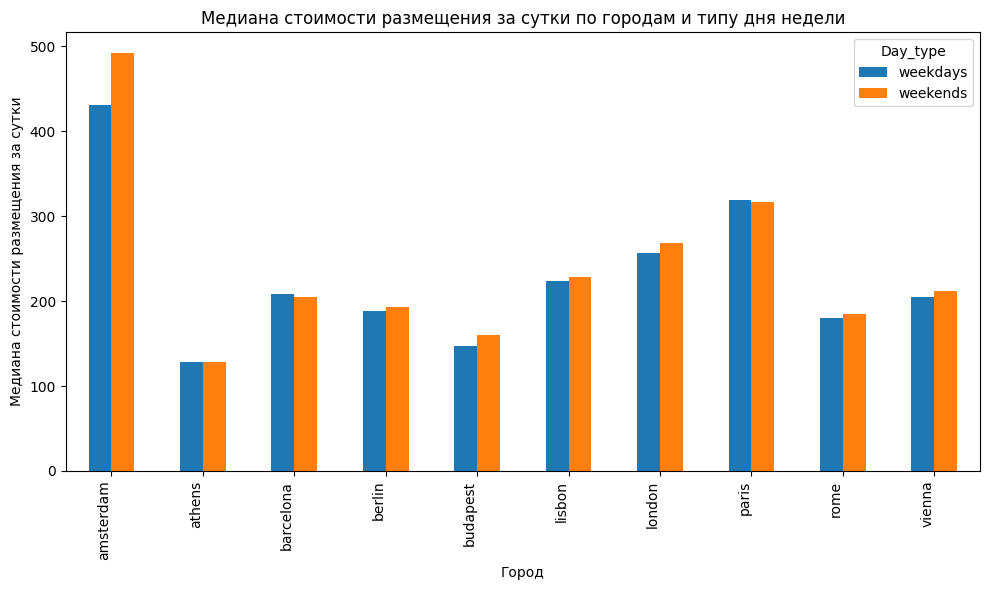

In [11]:
# Группировка данных и подсчет суммы realSum
grouped_data = final_df.groupby(["City", "Day_type"])["realSum"].median().unstack()

# Построение столбиковой диаграммы
grouped_data.plot(kind="bar", figsize=(10, 6))

# Настройка диаграммы
plt.xlabel('Город')
plt.ylabel('Медиана стоимости размещения за сутки')
plt.title('Медиана стоимости размещения за сутки по городам и типу дня недели')
plt.xticks(rotation=90, ha="right")  
plt.tight_layout()  

plt.show()

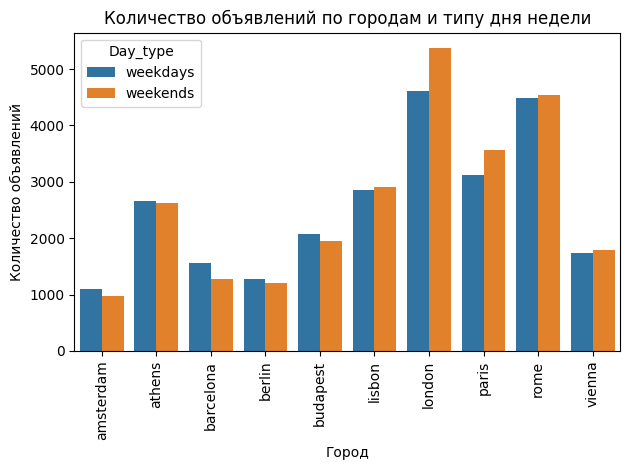

In [12]:
sns.countplot(x="City", hue='Day_type', data=final_df)
plt.xlabel('Город')
plt.ylabel('Количество объявлений')
plt.title('Количество объявлений по городам и типу дня недели')
plt.xticks(rotation=90)  
plt.tight_layout();

### С точки зрения туриста, рассмотрев медианные стоимости размещения в сутки и количество объявлений по городам, выберем Рим как объект анализа, т.к. количество объявлений в нем одно из самых высоких, а медианная стоимость средняя среди городов датасета.

In [13]:
df_rm = final_df.loc[final_df['City'] == 'rome'].reset_index(drop= True)
df_rm

realSum        room_type  room_shared  room_private  person_capacity  \
0     156.874664     Private room        False          True              2.0   
1     172.772543     Private room        False          True              2.0   
2     277.745307  Entire home/apt        False         False              4.0   
3     444.906834  Entire home/apt        False         False              6.0   
4     131.391298     Private room        False          True              3.0   
...          ...              ...          ...           ...              ...   
9022  413.812452  Entire home/apt        False         False              4.0   
9023  582.376733  Entire home/apt        False         False              6.0   
9024  878.591635  Entire home/apt        False         False              6.0   
9025  447.244757  Entire home/apt        False         False              4.0   
9026  265.821897  Entire home/apt        False         False              6.0   

      host_is_superhost  multi  biz  cleanliness_rating  \
0                  True      1    0                10.0   
1                 False      1    0                 9.0   
2                 False      0    1                 9.0   
3                 False      1    0                 9.0   
4                 False      1    0                 9.0   
...                 ...    ...  ...                 ...   
9022              False      0    1                10.0   
9023               True      0    1                10.0   
9024               True      1    0                10.0   
9025               True      1    0                10.0   
9026              False      0    1                10.0   

      guest_satisfaction_overall  ...      dist  metro_dist   attr_index  \
0                           95.0  ...  2.978468    1.595733   281.163932   
1                           80.0  ...  0.935371    0.649269   482.707193   
2                           90.0  ...  2.203025    0.494697   691.708998   
3                           92.0  ...  2.703010    1.295153   805.592641   
4                           91.0  ...  1.295968    0.867455   317.076369   
...                          ...  ...       ...         ...          ...   
9022                        97.0  ...  1.933569    0.270592   657.307139   
9023                        96.0  ...  3.124166    1.939505   540.341368   
9024                        99.0  ...  2.759242    1.195339   759.369097   
9025                        98.0  ...  1.641598    0.858837  1125.857244   
9026                        96.0  ...  4.411877    0.352493   167.701907   

      attr_index_norm   rest_index  rest_index_norm       lng       lat  City  \
0            6.230648   697.727246        15.191486  12.48654  41.92498  rome   
1           10.696887  1251.524333        27.249208  12.49627  41.90801  rome   
2           15.328408  1625.897266        35.400361  12.47700  41.90700  rome   
3           17.852092  2035.819533        44.325522  12.46969  41.90019  rome   
4            7.026475   836.622814        18.215634  12.51544  41.89463  rome   
...               ...          ...              ...       ...       ...   ...   
9022        14.562931  1408.407648        30.685786  12.48137  41.90860  rome   
9023        11.971503  1985.435361        43.257820  12.46700  41.89100  rome   
9024        16.824159  1783.268631        38.853097  12.46900  41.90100  rome   
9025        24.943866  1687.895816        36.775155  12.48342  41.89634  rome   
9026         3.715510   467.340278        10.182211  12.53000  41.86700  rome   

      Day_type  
0     weekdays  
1     weekdays  
2     weekdays  
3     weekdays  
4     weekdays  
...        ...  
9022  weekends  
9023  weekends  
9024  weekends  
9025  weekends  
9026  weekends  

[9027 rows x 21 columns]

### Описание данных

In [14]:
df_rm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9027 entries, 0 to 9026
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     9027 non-null   float64
 1   room_type                   9027 non-null   object 
 2   room_shared                 9027 non-null   bool   
 3   room_private                9027 non-null   bool   
 4   person_capacity             9027 non-null   float64
 5   host_is_superhost           9027 non-null   bool   
 6   multi                       9027 non-null   int64  
 7   biz                         9027 non-null   int64  
 8   cleanliness_rating          9027 non-null   float64
 9   guest_satisfaction_overall  9027 non-null   float64
 10  bedrooms                    9027 non-null   int64  
 11  dist                        9027 non-null   float64
 12  metro_dist                  9027 non-null   float64
 13  attr_index                  9027 

In [15]:
df_rm.describe()

realSum  person_capacity        multi          biz  \
count  9027.000000      9027.000000  9027.000000  9027.000000   
mean    205.391950         3.357372     0.385953     0.334109   
std     118.618103         1.309052     0.486847     0.471704   
min      46.057092         2.000000     0.000000     0.000000   
25%     138.405069         2.000000     0.000000     0.000000   
50%     182.591822         3.000000     0.000000     0.000000   
75%     240.806116         4.000000     1.000000     1.000000   
max    2418.348023         6.000000     1.000000     1.000000   

       cleanliness_rating  guest_satisfaction_overall     bedrooms  \
count         9027.000000                 9027.000000  9027.000000   
mean             9.514678                   93.122300     1.229755   
std              0.808415                    7.815107     0.549710   
min              2.000000                   20.000000     0.000000   
25%              9.000000                   91.000000     1.000000   
50%             10.000000                   95.000000     1.000000   
75%             10.000000                   98.000000     1.000000   
max             10.000000                  100.000000     5.000000   

              dist   metro_dist   attr_index  attr_index_norm   rest_index  \
count  9027.000000  9027.000000  9027.000000      9027.000000  9027.000000   
mean      3.026982     0.819794   470.578123        10.426968  1151.413675   
std       1.644095     0.631361   299.267619         6.631054   615.893623   
min       0.042789     0.011093    84.811373         1.879034   233.018570   
25%       1.880467     0.325294   242.807802         5.380492   657.812173   
50%       2.815721     0.621587   405.847946         8.993671   977.578443   
75%       4.030506     1.220111   627.739813        13.910833  1541.907500   
max       9.553819     4.147201  4513.563486       100.000000  4592.883342   

       rest_index_norm          lng          lat  
count      9027.000000  9027.000000  9027.000000  
mean         25.078056    12.486139    41.895372  
std          13.414188     0.028827     0.017964  
min           5.073485    12.400790    41.818000  
25%          14.329694    12.467430    41.884000  
50%          21.287324    12.480000    41.897300  
75%          33.587132    12.505560    41.907190  
max         100.000000    12.582980    41.951780

In [16]:
# Преобразование булевских признаков в 0 и 1
df_rm = df_rm.replace({True: 1, False: 0})
df_rm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9027 entries, 0 to 9026
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     9027 non-null   float64
 1   room_type                   9027 non-null   object 
 2   room_shared                 9027 non-null   int64  
 3   room_private                9027 non-null   int64  
 4   person_capacity             9027 non-null   float64
 5   host_is_superhost           9027 non-null   int64  
 6   multi                       9027 non-null   int64  
 7   biz                         9027 non-null   int64  
 8   cleanliness_rating          9027 non-null   float64
 9   guest_satisfaction_overall  9027 non-null   float64
 10  bedrooms                    9027 non-null   int64  
 11  dist                        9027 non-null   float64
 12  metro_dist                  9027 non-null   float64
 13  attr_index                  9027 

In [17]:
df_rm = df_rm.replace({'weekends': 1, 'weekdays': 0})
df_rm = df_rm.rename(columns = {'Day_type': 'weekends'})
df_rm

realSum        room_type  room_shared  room_private  person_capacity  \
0     156.874664     Private room            0             1              2.0   
1     172.772543     Private room            0             1              2.0   
2     277.745307  Entire home/apt            0             0              4.0   
3     444.906834  Entire home/apt            0             0              6.0   
4     131.391298     Private room            0             1              3.0   
...          ...              ...          ...           ...              ...   
9022  413.812452  Entire home/apt            0             0              4.0   
9023  582.376733  Entire home/apt            0             0              6.0   
9024  878.591635  Entire home/apt            0             0              6.0   
9025  447.244757  Entire home/apt            0             0              4.0   
9026  265.821897  Entire home/apt            0             0              6.0   

      host_is_superhost  multi  biz  cleanliness_rating  \
0                     1      1    0                10.0   
1                     0      1    0                 9.0   
2                     0      0    1                 9.0   
3                     0      1    0                 9.0   
4                     0      1    0                 9.0   
...                 ...    ...  ...                 ...   
9022                  0      0    1                10.0   
9023                  1      0    1                10.0   
9024                  1      1    0                10.0   
9025                  1      1    0                10.0   
9026                  0      0    1                10.0   

      guest_satisfaction_overall  ...      dist  metro_dist   attr_index  \
0                           95.0  ...  2.978468    1.595733   281.163932   
1                           80.0  ...  0.935371    0.649269   482.707193   
2                           90.0  ...  2.203025    0.494697   691.708998   
3                           92.0  ...  2.703010    1.295153   805.592641   
4                           91.0  ...  1.295968    0.867455   317.076369   
...                          ...  ...       ...         ...          ...   
9022                        97.0  ...  1.933569    0.270592   657.307139   
9023                        96.0  ...  3.124166    1.939505   540.341368   
9024                        99.0  ...  2.759242    1.195339   759.369097   
9025                        98.0  ...  1.641598    0.858837  1125.857244   
9026                        96.0  ...  4.411877    0.352493   167.701907   

      attr_index_norm   rest_index  rest_index_norm       lng       lat  City  \
0            6.230648   697.727246        15.191486  12.48654  41.92498  rome   
1           10.696887  1251.524333        27.249208  12.49627  41.90801  rome   
2           15.328408  1625.897266        35.400361  12.47700  41.90700  rome   
3           17.852092  2035.819533        44.325522  12.46969  41.90019  rome   
4            7.026475   836.622814        18.215634  12.51544  41.89463  rome   
...               ...          ...              ...       ...       ...   ...   
9022        14.562931  1408.407648        30.685786  12.48137  41.90860  rome   
9023        11.971503  1985.435361        43.257820  12.46700  41.89100  rome   
9024        16.824159  1783.268631        38.853097  12.46900  41.90100  rome   
9025        24.943866  1687.895816        36.775155  12.48342  41.89634  rome   
9026         3.715510   467.340278        10.182211  12.53000  41.86700  rome   

     weekends  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
9022        1  
9023        1  
9024        1  
9025        1  
9026        1  

[9027 rows x 21 columns]

In [18]:
df_rm_wdays = df_rm.loc[df_rm['weekends'] == 0]
df_rm_wdays

realSum        room_type  room_shared  room_private  person_capacity  \
0     156.874664     Private room            0             1              2.0   
1     172.772543     Private room            0             1              2.0   
2     277.745307  Entire home/apt            0             0              4.0   
3     444.906834  Entire home/apt            0             0              6.0   
4     131.391298     Private room            0             1              3.0   
...          ...              ...          ...           ...              ...   
4487  518.551423  Entire home/apt            0             0              6.0   
4488  464.779183  Entire home/apt            0             0              4.0   
4489  297.383864  Entire home/apt            0             0              4.0   
4490  876.019919  Entire home/apt            0             0              6.0   
4491  320.529306  Entire home/apt            0             0              6.0   

      host_is_superhost  multi  biz  cleanliness_rating  \
0                     1      1    0                10.0   
1                     0      1    0                 9.0   
2                     0      0    1                 9.0   
3                     0      1    0                 9.0   
4                     0      1    0                 9.0   
...                 ...    ...  ...                 ...   
4487                  1      0    1                10.0   
4488                  1      0    1                10.0   
4489                  1      0    1                10.0   
4490                  1      1    0                10.0   
4491                  1      0    0                10.0   

      guest_satisfaction_overall  ...      dist  metro_dist   attr_index  \
0                           95.0  ...  2.978468    1.595733   281.163932   
1                           80.0  ...  0.935371    0.649269   482.707193   
2                           90.0  ...  2.203025    0.494697   691.708998   
3                           92.0  ...  2.703010    1.295153   805.592641   
4                           91.0  ...  1.295968    0.867455   317.076369   
...                          ...  ...       ...         ...          ...   
4487                        96.0  ...  3.124173    1.939527   540.342012   
4488                        99.0  ...  1.734508    0.955248  1174.176636   
4489                        99.0  ...  3.240611    1.658117   549.823128   
4490                        99.0  ...  2.759241    1.195331   759.368210   
4491                        97.0  ...  3.154942    0.511942   403.283533   

      attr_index_norm   rest_index  rest_index_norm       lng       lat  City  \
0            6.230648   697.727246        15.191486  12.48654  41.92498  rome   
1           10.696887  1251.524333        27.249208  12.49627  41.90801  rome   
2           15.328408  1625.897266        35.400361  12.47700  41.90700  rome   
3           17.852092  2035.819533        44.325522  12.46969  41.90019  rome   
4            7.026475   836.622814        18.215634  12.51544  41.89463  rome   
...               ...          ...              ...       ...       ...   ...   
4487        11.974086  1985.363665        43.226956  12.46700  41.89100  rome   
4488        26.019986  1799.576966        39.181857  12.48200  41.89700  rome   
4489        12.184189  1384.689728        30.148593  12.46400  41.89500  rome   
4490        16.827749  1783.254484        38.826470  12.46900  41.90100  rome   
4491         8.936843  1197.154353        26.065420  12.47800  41.87900  rome   

     weekends  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
4487        0  
4488        0  
4489        0  
4490        0  
4491        0  

[4492 rows x 21 columns]

In [19]:
df_rm_wends = df_rm.loc[df_rm['weekends'] == 1]
df_rm_wends

realSum        room_type  room_shared  room_private  person_capacity  \
4492  172.772543     Private room            0             1              2.0   
4493  156.874664     Private room            0             1              2.0   
4494  195.917986     Private room            0             1              2.0   
4495  298.552825  Entire home/apt            0             0              4.0   
4496  131.391298     Private room            0             1              3.0   
...          ...              ...          ...           ...              ...   
9022  413.812452  Entire home/apt            0             0              4.0   
9023  582.376733  Entire home/apt            0             0              6.0   
9024  878.591635  Entire home/apt            0             0              6.0   
9025  447.244757  Entire home/apt            0             0              4.0   
9026  265.821897  Entire home/apt            0             0              6.0   

      host_is_superhost  multi  biz  cleanliness_rating  \
4492                  0      0    0                10.0   
4493                  1      1    0                10.0   
4494                  0      1    0                 9.0   
4495                  0      0    1                 9.0   
4496                  0      1    0                 9.0   
...                 ...    ...  ...                 ...   
9022                  0      0    1                10.0   
9023                  1      0    1                10.0   
9024                  1      1    0                10.0   
9025                  1      1    0                10.0   
9026                  0      0    1                10.0   

      guest_satisfaction_overall  ...      dist  metro_dist   attr_index  \
4492                        93.0  ...  1.222582    0.397760   550.078435   
4493                        95.0  ...  2.978482    1.595742   281.162756   
4494                        80.0  ...  0.935379    0.649273   482.708059   
4495                        90.0  ...  2.203023    0.494699   691.716421   
4496                        91.0  ...  1.295984    0.867473   317.074092   
...                          ...  ...       ...         ...          ...   
9022                        97.0  ...  1.933569    0.270592   657.307139   
9023                        96.0  ...  3.124166    1.939505   540.341368   
9024                        99.0  ...  2.759242    1.195339   759.369097   
9025                        98.0  ...  1.641598    0.858837  1125.857244   
9026                        96.0  ...  4.411877    0.352493   167.701907   

      attr_index_norm   rest_index  rest_index_norm       lng       lat  City  \
4492        12.187232  1075.412107        23.430621  12.50181  41.88987  rome   
4493         6.229285   697.725034        15.201736  12.48654  41.92498  rome   
4494        10.694611  1251.514249        27.267459  12.49627  41.90801  rome   
4495        15.325284  1625.911297        35.424663  12.47700  41.90700  rome   
4496         7.024917   836.616071        18.227835  12.51544  41.89463  rome   
...               ...          ...              ...       ...       ...   ...   
9022        14.562931  1408.407648        30.685786  12.48137  41.90860  rome   
9023        11.971503  1985.435361        43.257820  12.46700  41.89100  rome   
9024        16.824159  1783.268631        38.853097  12.46900  41.90100  rome   
9025        24.943866  1687.895816        36.775155  12.48342  41.89634  rome   
9026         3.715510   467.340278        10.182211  12.53000  41.86700  rome   

     weekends  
4492        1  
4493        1  
4494        1  
4495        1  
4496        1  
...       ...  
9022        1  
9023        1  
9024        1  
9025        1  
9026        1  

[4535 rows x 21 columns]

In [20]:
fig = px.scatter_mapbox(df_rm_wends, lat='lat', lon='lng', 
                        color='realSum', hover_name='realSum', labels='realSum', 
                        zoom=9, height=900, width=850, color_continuous_scale='plasma'
                        )

fig.update_layout(mapbox_style='open-street-map', title_text='Объекты размещения на airbnb в выходные дни (cтоимость за сутки)',
                   title_x=0.3, legend_title_text='realSum')
fig.show()

In [21]:
fig = px.scatter_mapbox(df_rm_wdays, lat='lat', lon='lng', 
                        color='realSum', hover_name='realSum', labels='realSum', 
                        zoom=10, height=900, width=850, color_continuous_scale='agsunset'
                        )

fig.update_layout(mapbox_style='open-street-map', title_text='Объекты размещения на airbnb в будние дни (cтоимость за сутки)',
                   title_x=0.3, legend_title_text='index_office')
fig.show()

### Чтобы выбрать когда ехать (в будни или в выходные) проверим каких объявлений в какие дни больше:
- тип комнаты (хотим, чтобы был отдельный дом Entire home/apt или отдельная комната Private room)
- чтобы было больше объявлений с частными комнатами room_private и меньше с комнатами совместного проживания room_shared
- с общим рейтингом выше среднего и с рейтингом чистоты выше среднего
- с меньшим расстоянием от центра города (ближе среднего) и с меньшим расстоянием до метро (ближе среднего)

### Категориальные переменные

In [22]:
# Вывод долей типов комнаты по типу дня
df_rm.groupby('weekends')['room_type'].value_counts(normalize=True).unstack()

room_type  Entire home/apt  Private room  Shared room
weekends                                             
0                 0.613090      0.385352     0.001558
1                 0.618964      0.379934     0.001103

Видим, что от типа дня особо не зависит доля объявлений с отдельным домом Entire home/apt или отдельной комнатой Private room. Для наглядности построим гистрограмму.

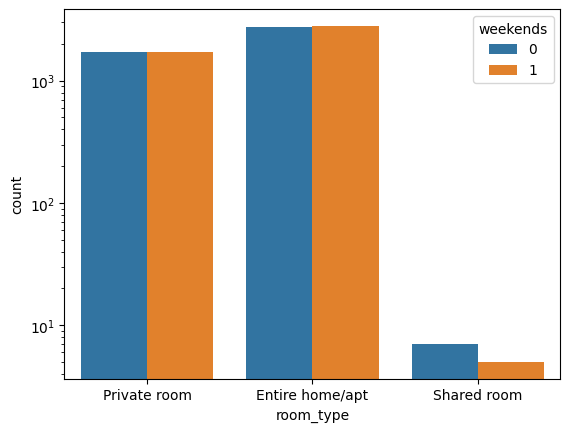

In [23]:
sns.countplot(x='room_type', data=df_rm, hue='weekends')
plt.yscale('log');

In [24]:
# Вывод долей типов комнаты (есть комнаты совместного проживания или нет) по типу дня
df_rm.groupby('weekends')['room_shared'].value_counts(normalize=True).unstack()

room_shared         0         1
weekends                       
0            0.998442  0.001558
1            0.998897  0.001103

Аналогично, видно, что от типа дня особо не зависит доля объявлений с комнатами совместного проживания room_shared (нас интересует room_shared = 0). Для наглядности построим гистрограмму.

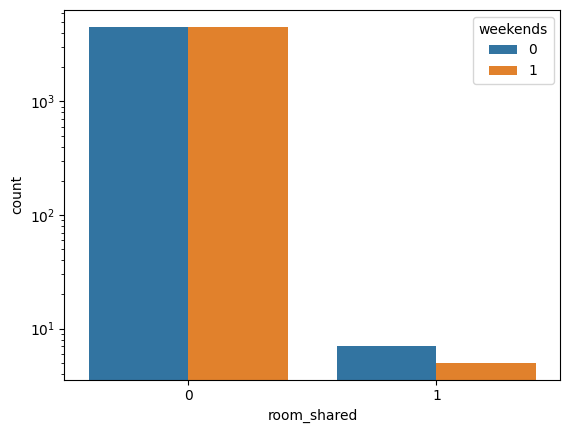

In [25]:
sns.countplot(x='room_shared', data=df_rm, hue='weekends')
plt.yscale('log');

In [26]:
# Вывод долей типов комнаты (есть частные комнаты или нет) по типу дня
df_rm.groupby('weekends')['room_private'].value_counts(normalize=True).unstack()

room_private         0         1
weekends                        
0             0.614648  0.385352
1             0.620066  0.379934

Аналогично, видно, что от типа дня особо не зависит доля объявлений с комнатами совместного проживания room_private (нас интересует room_private = 1). Для наглядности построим гистрограмму.

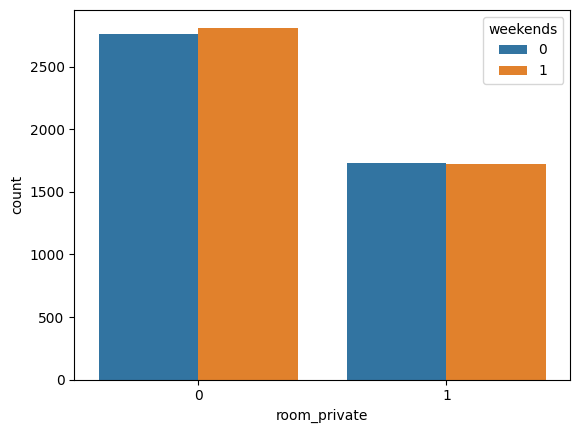

In [27]:
sns.countplot(x='room_private', data=df_rm, hue='weekends');

### Количественные переменные

Для того, чтобы проверить в какие дни больше объявлений с общим рейтингом выше среднего и с рейтингом чистоты выше среднего, а также с меньшим расстоянием от центра города (ближе среднего) и с меньшим расстоянием до метро (ближе среднего) - разобьем следующие переменные на группы:
- guest_satisfaction_overall 
- cleanliness_rating 
- dist 
- metro_dist 

In [39]:
# Разбиение общего рейтинга на группы
bins = [0, 25, 60, 75, 90, df_rm['guest_satisfaction_overall'].max() + 1]
labels = ['Низкий', 'Ниже среднего', 'Средний', 'Выше среднего', 'Высокий']

df_rm['guest_satisfaction_overall_cat'] = pd.cut(df_rm['guest_satisfaction_overall'], bins, labels=labels, right=False)

df_rm['guest_satisfaction_overall_cat'].value_counts()

guest_satisfaction_overall_cat
Высокий          7238
Выше среднего    1578
Средний           172
Низкий             23
Ниже среднего      16
Name: count, dtype: int64

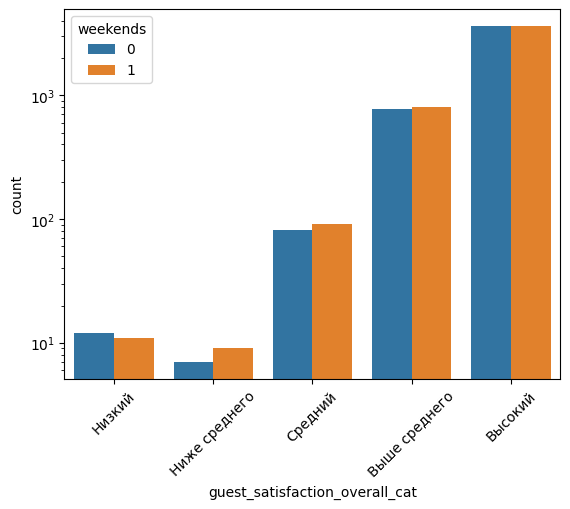

In [40]:
# Построение диаграммы для визуализации количества объявлений по общему рейтингу и типу дня
sns.countplot(x='guest_satisfaction_overall_cat', data=df_rm, hue='weekends')
plt.xticks(rotation=45)
plt.yscale('log');

Видим, что для групп "Выше среднего" и "Высокий" нет особого различия общего рейтинга по типу дня. При этом объявлений с такими группами больше остальных.

In [34]:
# Разбиение рейтинга чистоты на группы
bins = [0, 3, 6, 8, 9, df_rm['cleanliness_rating'].max() + 1]
labels = ['Низкий', 'Ниже среднего', 'Средний', 'Выше среднего', 'Высокий']

df_rm['cleanliness_rating_cat'] = pd.cut(df_rm['cleanliness_rating'], bins, labels=labels, right=False)

df_rm['cleanliness_rating_cat'].value_counts()

cleanliness_rating_cat
Высокий          8369
Выше среднего     489
Средний           127
Ниже среднего      25
Низкий             17
Name: count, dtype: int64

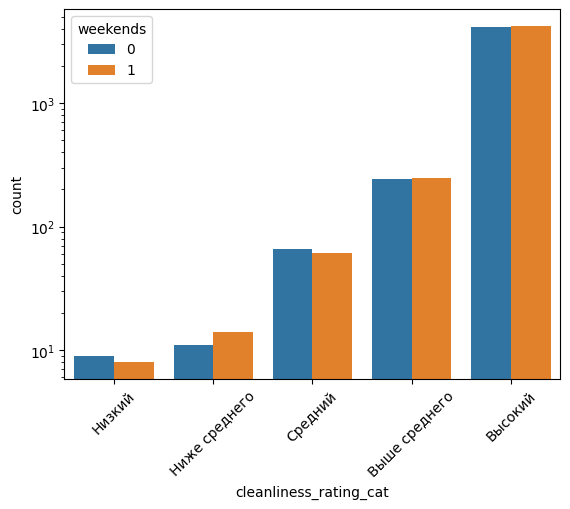

In [35]:
# Построение диаграммы для визуализации количества объявлений по общему рейтингу и типу дня
sns.countplot(x='cleanliness_rating_cat', data=df_rm, hue='weekends')
plt.xticks(rotation=45)
plt.yscale('log');

Аналогично, для групп "Выше среднего" и "Высокий" нет особого различия в рейтинге чистоты по типу дня. При этом объявлений с такими группами больше остальных (с Высоким рейтингом больше всего).

In [42]:
# Разбиение расстояния от центра города на группы
bins = [0, 3, 5, 7, 9, df_rm['dist'].max() + 1]
labels = ['Близко', 'Ближе среднего', 'Средне', 'Дальше среднего', 'Далеко']

df_rm['dist_cat'] = pd.cut(df_rm['dist'], bins, labels=labels, right=False)

df_rm['dist_cat'].value_counts()

dist_cat
Близко             4927
Ближе среднего     3042
Средне              832
Дальше среднего     210
Далеко               16
Name: count, dtype: int64

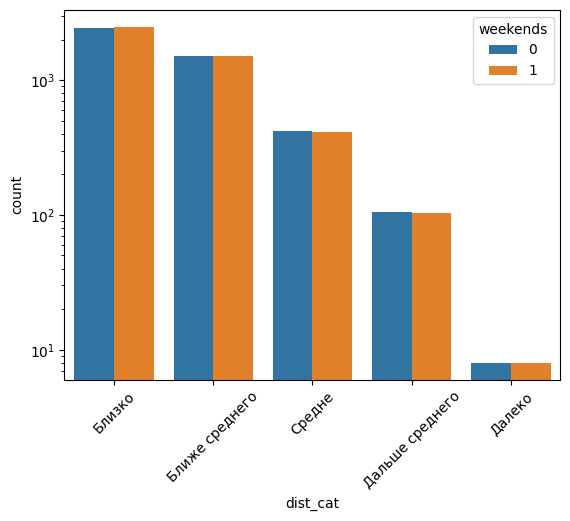

In [43]:
# Построение диаграммы для визуализации количества объявлений по расстоянию от центра и типу дня
sns.countplot(x='dist_cat', data=df_rm, hue='weekends')
plt.xticks(rotation=45)
plt.yscale('log');

Для групп "Ближе среднего" и "Близко" нет особого различия в расстоянии от центра по типу дня. При этом объявлений с такими группами расстояния от центра больше остальных.

In [44]:
# Разбиение расстояния от центра города на группы
bins = [0, 1, 2, 3, 4, df_rm['metro_dist'].max() + 1]
labels = ['Близко', 'Ближе среднего', 'Средне', 'Дальше среднего', 'Далеко']

df_rm['metro_dist_cat'] = pd.cut(df_rm['metro_dist'], bins, labels=labels, right=False)

df_rm['metro_dist_cat'].value_counts()

metro_dist_cat
Близко             6078
Ближе среднего     2494
Средне              412
Дальше среднего      40
Далеко                3
Name: count, dtype: int64

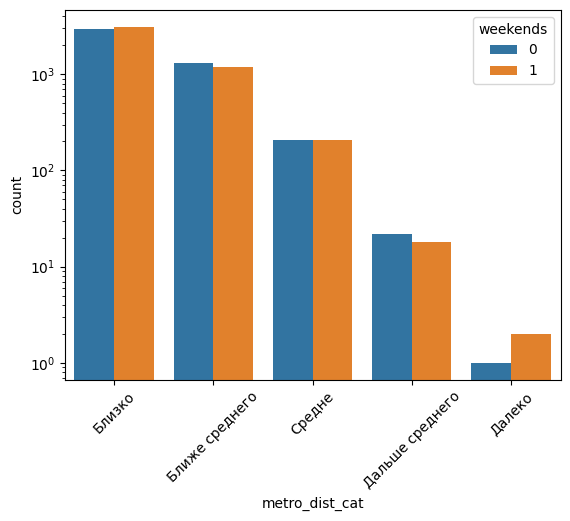

In [45]:
# Построение диаграммы для визуализации количества объявлений по расстоянию от центра и типу дня
sns.countplot(x='metro_dist_cat', data=df_rm, hue='weekends')
plt.xticks(rotation=45)
plt.yscale('log');

Для групп "Ближе среднего" и "Близко" нет особого различия в расстоянии от метро по типу дня. При этом объявлений с такими группами расстояния от метро больше остальных.

### Таким образом, можно выбрать и выходной, и будний день. Выберем выходной.

In [46]:
df_rm_wends = df_rm.loc[df_rm['weekends'] == 1]

Проверим предположения зависимости:
1. realSum — Стоимость размещения за сутки (Numeric) от:
- room_type — Тип комнаты или номера (Categorical) Private room Entire home/apt Shared room
- guest_satisfaction_overall — Общий рейтинг (Numeric)
- host_is_superhost — Суперхост ли хозяин (Boolean)

2. person_capacity — Максимальное кол-во постояльцев (Numeric) от:
- room_shared — Есть комнаты совместного проживания (Boolean)
- room_private — Есть частные комнаты (Boolean)
- bedrooms — Количество спален (Numeric)

3. guest_satisfaction_overall — Общий рейтинг (Numeric) от:
- dist — Расстояние от центра города (Numeric)
- metro_dist — Расстояние до ближайшей станции метро (Numeric)
- realSum — Стоимость размещения за сутки (Numeric)
- cleanliness_rating — Рейтинг чистоты (Numeric)

Для начала проверим количественные переменные на выбросы и близость к нормальному распределению.

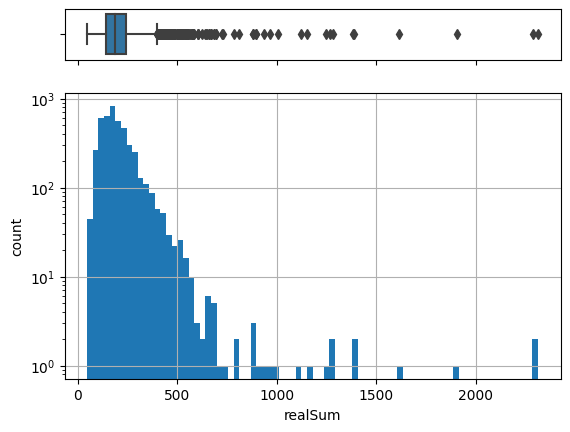

In [47]:
fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                    sharex = True, # единая шкала по оси x 
                                    gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте

sns.boxplot(x = df_rm_wends['realSum'], ax = ax_box)

df_rm_wends['realSum'].hist(bins=80, ax = ax_hist)
plt.yscale('log');

ax_box.set(xlabel = '') # пустые кавычки удаляют подпись
ax_hist.set(xlabel = 'realSum')
ax_hist.set(ylabel = 'count')
 
plt.show()

В переменной realSum много выбросов и график скошен вправо.

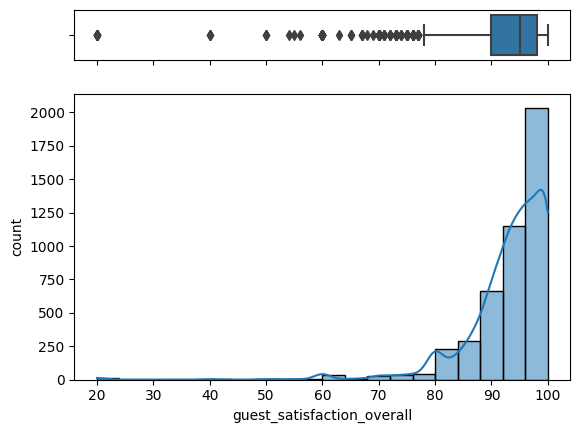

In [48]:
fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                    sharex = True, # единая шкала по оси x 
                                    gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте

sns.boxplot(x = df_rm_wends['guest_satisfaction_overall'], ax = ax_box)

sns.histplot(data = df_rm_wends, x = 'guest_satisfaction_overall', bins = 20, kde = True, ax=ax_hist)

ax_box.set(xlabel = '') # пустые кавычки удаляют подпись 
ax_hist.set(xlabel = 'guest_satisfaction_overall')
ax_hist.set(ylabel = 'count')
 
plt.show()

В переменной guest_satisfaction_overall много выбросов и график скошен влево.

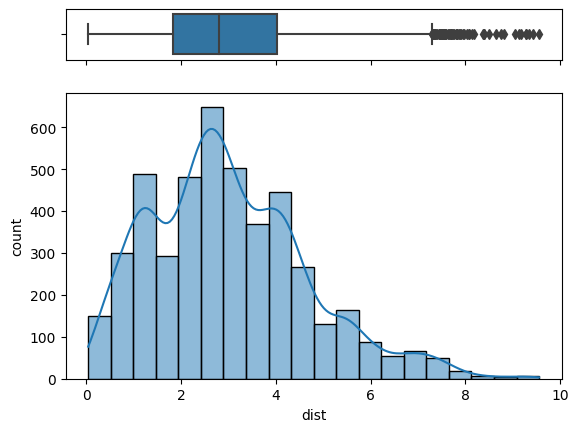

In [49]:
fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                    sharex = True, # единая шкала по оси x и
                                    gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте

sns.boxplot(x = df_rm_wends['dist'], ax = ax_box)

sns.histplot(data = df_rm_wends, x = 'dist', bins = 20, kde = True, ax=ax_hist)

# добавим подписи к каждому из графиков через метод .set()
ax_box.set(xlabel = '') # пустые кавычки удаляют подпись (!)
ax_hist.set(xlabel = 'dist')
ax_hist.set(ylabel = 'count')
 
# выведем результат
plt.show()

В переменной dist много выбросов и график скошен вправо.

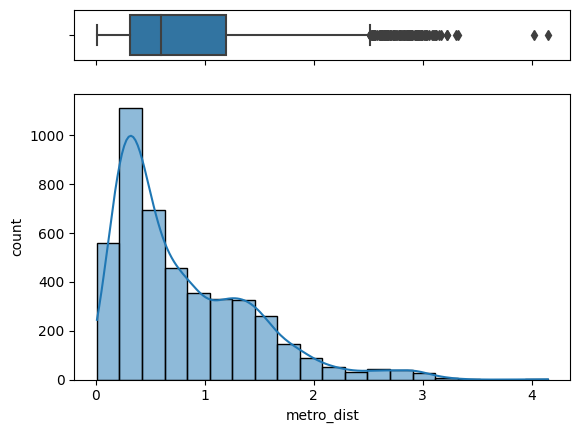

In [50]:
fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                    sharex = True, # единая шкала по оси x
                                    gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте

sns.boxplot(x = df_rm_wends['metro_dist'], ax = ax_box)

sns.histplot(data = df_rm_wends, x = 'metro_dist', bins = 20, kde = True, ax=ax_hist)

ax_box.set(xlabel = '') # пустые кавычки удаляют подпись 
ax_hist.set(xlabel = 'metro_dist')
ax_hist.set(ylabel = 'count')
 
plt.show()

В переменной metro_dist много выбросов и график скошен вправо.

#### Следовательно, при поиске взаимосвязей между количественными параметрами нужно будет использовать непараметрические (ранговые) методы.

Посмотрим как realSum (Стоимость размещения за сутки) зависит от room_type (Типа комнаты или номера: Private room, Entire home/apt, Shared room)

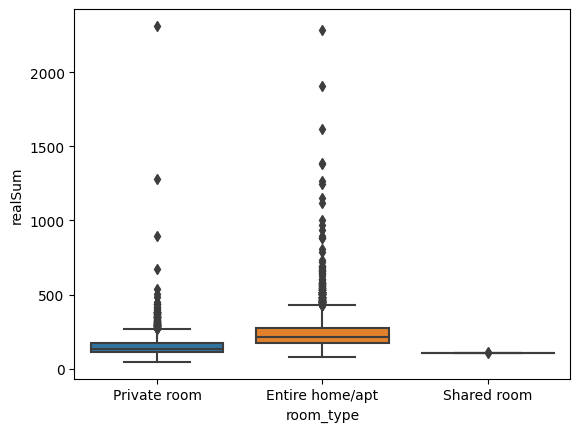

In [118]:
sns.boxplot(x = 'room_type', y = 'realSum', data = df_rm_wends);

Видно, что для Entire home/apt медианная цена выше, чем для остальных типов комнаты.

<Axes: xlabel='metro_dist_cat', ylabel='realSum'>

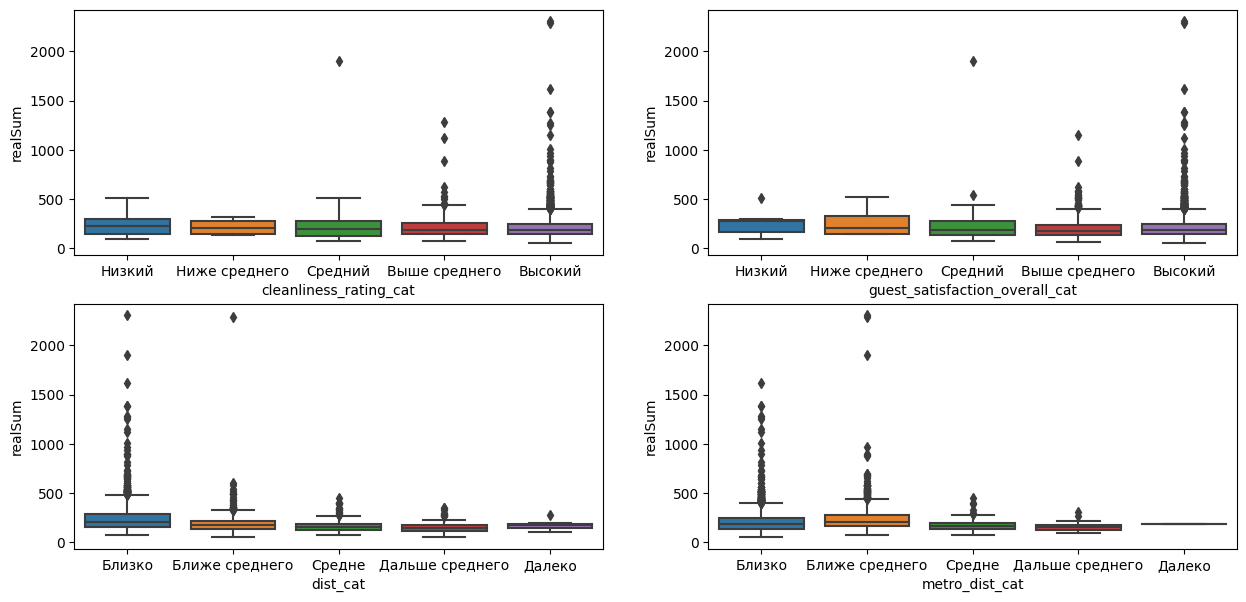

In [68]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,7)) 

sns.boxplot(x = 'cleanliness_rating_cat', y = 'realSum', data = df_rm_wends, ax=ax1)
sns.boxplot(x = 'guest_satisfaction_overall_cat', y = 'realSum', data = df_rm_wends, ax=ax2)
sns.boxplot(x = 'dist_cat', y = 'realSum', data = df_rm_wends, ax=ax3)
sns.boxplot(x = 'metro_dist_cat', y = 'realSum', data = df_rm_wends, ax=ax4)

Посмотрим на цену в зависимости от группы общего рейтинга.

In [52]:
px.box(df_rm_wends, x = 'guest_satisfaction_overall_cat', y = 'realSum', points = 'all')

Какой-то наглядной зависимости не видно.

Посмотрим на цену в зависимости от того, суперхост ли хозяин.

In [69]:
px.box(df_rm_wends, x = 'host_is_superhost', y = 'realSum', points = 'all')

Посмотрим на общий рейтинг в зависимости от расстояния до центра, до метро и от рейтинга чистоты.

In [73]:
px.box(df_rm_wends, x = 'dist_cat', y = 'guest_satisfaction_overall', points = 'all')

In [76]:
px.box(df_rm_wends, x = 'metro_dist_cat', y = 'guest_satisfaction_overall', points = 'all')

In [77]:
px.box(df_rm_wends, x = 'cleanliness_rating', y = 'guest_satisfaction_overall', points = 'all')

Прослеживается зависимость общего рейтинга от рейтинга чистоты - чем выше один, тем выше другой.

#### Взаимосвязи

Между количественными переменными

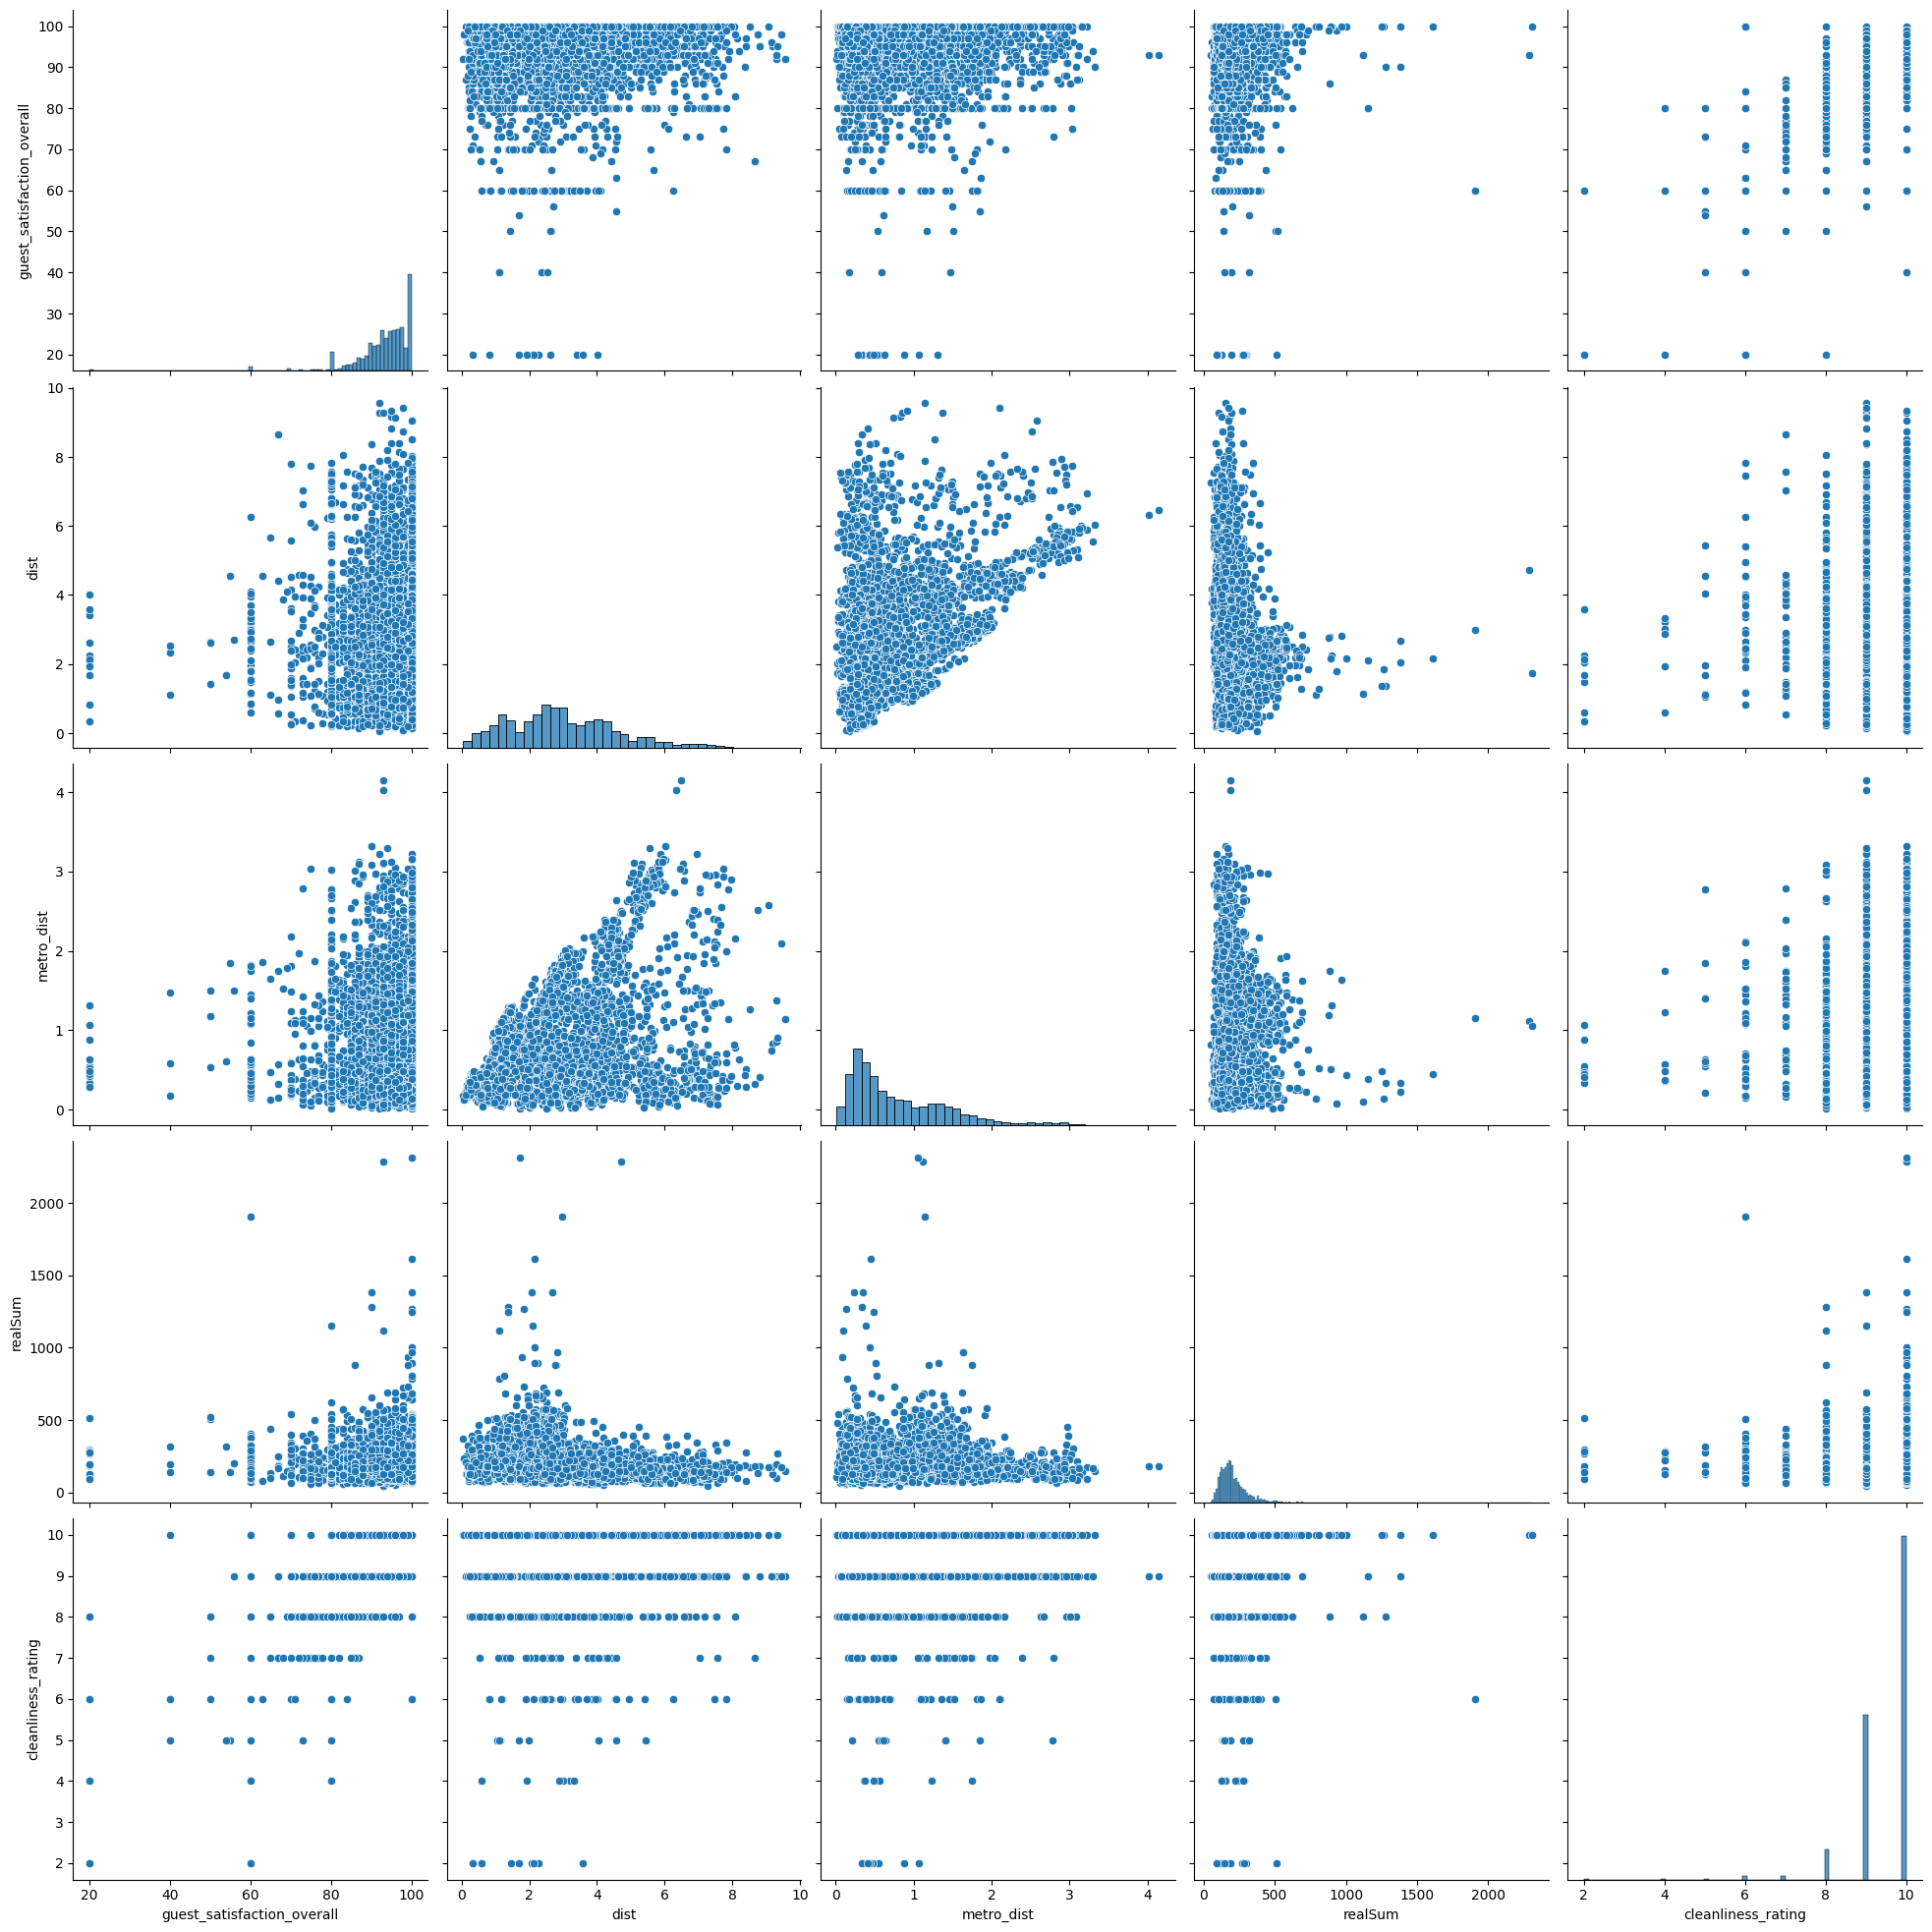

In [78]:
sns.pairplot(df_rm_wends[['guest_satisfaction_overall', 'dist', 'metro_dist', 'realSum', 'cleanliness_rating']],
             height = 4);

## Корреляции

### Для удобства, давайте обобщим, какие методы и когда можно использовать.

Если речь идет о двух количественных переменных мы можем использовать:
* коэффициент Пирсона, если речь идет о выявлении линейной зависимости
* коэффициенты Спирмена и Кендалла, если требуется оценить нелинейную взаимосвязь

В случае двух категориальных переменных, подойдут:
* уже упомянутые коэффициенты Спирмена и Кендалла для порядковых категорий, а также
* коэффициент неопределенности Тиля

Когда перед нами одна количественная и одна категориальная переменные, мы можем рассчитать:
* точечно-бисериальный коэффициент корреляции, в случае, если категориальная переменная имеет дихотомическую шкалу; или
* корреляционное отношение в случае множества категорий

https://www.dmitrymakarov.ru/opt/relationship-03/#3-korrelyatsiya

𝜑_K - представленный в 2018 универсальный коэффициент. Улавливает нелинейную зависимость; подходит для всех типов переменных.
- https://phik.readthedocs.io/en/latest/
- https://github.com/KaveIO/PhiK/tree/master/phik/notebooks
- https://arxiv.org/abs/1811.11440)

In [80]:
# Коэффициент Спирмена для цены от общего рейтинга
df_rm_wends[['realSum', 'guest_satisfaction_overall']].corr(method = 'spearman').iloc[0, 1].round(2)

0.09

Слабая положительная связь цены и общего рейтинга

In [81]:
# Коэффициент Спирмена для максимального количества постояльцев и количества спален
df_rm_wends[['person_capacity', 'bedrooms']].corr(method = 'spearman').iloc[0, 1].round(2)

0.58

Умеренная положительная зависимость максимального количества постояльцев и количества спален

In [85]:
# Коэффициент Спирмена для общего рейтинга, расстояния от центра, от метро, цены, рейтинга чистоты
df_rm_wends[['guest_satisfaction_overall', 'dist', 'metro_dist', 'realSum', 'cleanliness_rating']].corr(method = 'spearman')

guest_satisfaction_overall      dist  metro_dist  \
guest_satisfaction_overall                    1.000000  0.107264   -0.001204   
dist                                          0.107264  1.000000    0.309708   
metro_dist                                   -0.001204  0.309708    1.000000   
realSum                                       0.093355 -0.247328    0.078067   
cleanliness_rating                            0.613250  0.071942   -0.017630   

                             realSum  cleanliness_rating  
guest_satisfaction_overall  0.093355            0.613250  
dist                       -0.247328            0.071942  
metro_dist                  0.078067           -0.017630  
realSum                     1.000000            0.039529  
cleanliness_rating          0.039529            1.000000

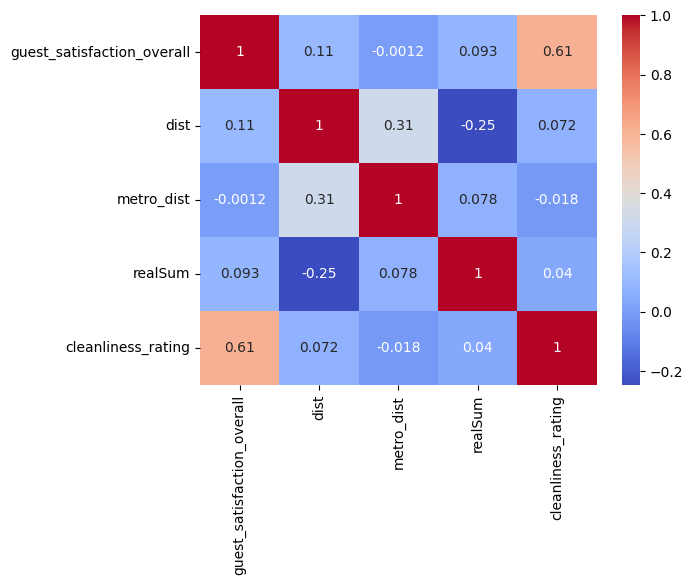

In [83]:
sns.heatmap(df_rm_wends[['guest_satisfaction_overall', 'dist', 'metro_dist', 'realSum', 'cleanliness_rating']].corr(method = 'spearman'), annot=True,
            cmap= 'coolwarm'
            );


Видим между ценой и общим рейтингом слабую положительную связь.

Между общим рейтингом и:
- расстоянием до центра слабая положительная связь, что конечно странно
- расстоянием до метро слабые отрицательная связь
- ценой слабая положительная связь
- рейтингом чистоты умеренная положительная связь.

Точечно-бисериальная корреляция (point-biserial correlation) позволяет оценить взаимосвязь между количественной переменной и дихотомической (выраженной двумя значениями) качественной переменной.

In [88]:
from scipy import stats

# Точечно-бисериальная корреляция между ценой и суперхост ли хозяин
stats.pointbiserialr(df_rm_wends['realSum'], df_rm_wends['host_is_superhost'])[0]

0.028403554749337277

Слабая положительная связь.

In [93]:
# Точечно-бисериальная корреляция между максимальным кол-вом постояльцев и есть ли комнаты совместного проживания
stats.pointbiserialr(df_rm_wends['person_capacity'], df_rm_wends['room_shared'])[0]

0.02131778484630785

Слабая положительная связь.

In [96]:
# Точечно-бисериальная корреляция между максимальным кол-вом постояльцев и есть ли частные комнаты
stats.pointbiserialr(df_rm_wends['person_capacity'], df_rm_wends['room_private'])[0]

-0.5843900637545332

Умеренная отрицательная связь.

### 𝜑_K

In [101]:
data_types = {'realSum': 'interval',
             'guest_satisfaction_overall':'interval',
             'cleanliness_rating':'interval',
             'dist':'interval',
             'metro_dist':'interval',
             'attr_index':'interval',
             'attr_index_norm':'interval'}

interval_cols = [col for col, v in data_types.items() if v=='interval' and col in df_rm_wends.columns]
interval_cols

['realSum',
 'guest_satisfaction_overall',
 'cleanliness_rating',
 'dist',
 'metro_dist',
 'attr_index',
 'attr_index_norm']

In [102]:
# bin the interval variables
data_binned, binning_dict = bin_data(df_rm_wends, cols=interval_cols, retbins=True)
binning_dict

{'realSum': [(46.05709209080448, 272.62525424917544),
  (272.62525424917544, 499.1934164075464),
  (499.1934164075464, 725.7615785659174),
  (725.7615785659174, 952.3297407242884),
  (952.3297407242884, 1178.8979028826593),
  (1178.8979028826593, 1405.46606504103),
  (1405.46606504103, 1632.0342271994011),
  (1858.6023893577722, 2085.1705515161434),
  (2085.1705515161434, 2311.738713674514)],
 'guest_satisfaction_overall': [(19.9999999999998, 27.999999999999822),
  (35.999999999999844, 43.99999999999986),
  (43.99999999999986, 51.99999999999988),
  (51.99999999999988, 59.9999999999999),
  (59.9999999999999, 67.99999999999991),
  (67.99999999999991, 75.99999999999994),
  (75.99999999999994, 83.99999999999996),
  (83.99999999999996, 91.99999999999997),
  (91.99999999999997, 100.0)],
 'cleanliness_rating': [(1.99999999999998, 2.799999999999982),
  (3.5999999999999837, 4.399999999999986),
  (4.399999999999986, 5.199999999999988),
  (5.999999999999989, 6.799999999999992),
  (6.7999999999999


### 𝜑_K correlation matrix

Теперь приступим к расчету коэффициента корреляции phik между парами переменных.

Обратите внимание, что исходный набор данных используется в качестве входных данных, группирование интервальных переменных выполняется автоматически.

In [103]:
phik_overview = df_rm_wends.phik_matrix(interval_cols=interval_cols)
phik_overview

realSum  room_type  room_shared  \
realSum                         1.000000   0.376837     0.000000   
room_type                       0.376837   1.000000     1.000000   
room_shared                     0.000000   1.000000     1.000000   
room_private                    0.256554   1.000000     0.019023   
person_capacity                 0.315050   0.504215     0.018260   
host_is_superhost               0.000000   0.041476     0.006976   
multi                           0.058071   0.087752     0.000000   
biz                             0.109506   0.058446     0.000000   
cleanliness_rating              0.131949   0.000000     0.000000   
guest_satisfaction_overall      0.195744   0.150109     0.047307   
bedrooms                        0.313588   0.573579     0.000000   
dist                            0.236726   0.207013     0.016217   
metro_dist                      0.089200   0.171011     0.027695   
attr_index                      0.329159   0.239818     0.000000   
attr_index_norm                 0.329159   0.239818     0.000000   
rest_index                      1.000000   1.000000     1.000000   
rest_index_norm                 1.000000   1.000000     1.000000   
lng                             0.940057   0.000000     0.000000   
lat                             0.000000   0.000000     0.000000   
guest_satisfaction_overall_cat  0.100754   0.059280     0.025355   
cleanliness_rating_cat          0.103847   0.000000     0.000000   
dist_cat                        0.229027   0.033817     0.000000   
metro_dist_cat                  0.091562   0.129315     0.000000   

                                room_private  person_capacity  \
realSum                             0.256554         0.315050   
room_type                           1.000000         0.504215   
room_shared                         0.019023         0.018260   
room_private                        1.000000         0.512827   
person_capacity                     0.512827         1.000000   
host_is_superhost                   0.102798         0.026614   
multi                               0.226717         0.081193   
biz                                 0.149232         0.011287   
cleanliness_rating                  0.021322         0.023866   
guest_satisfaction_overall          0.079330         0.040405   
bedrooms                            0.557392         0.481245   
dist                                0.231717         0.146138   
metro_dist                          0.188463         0.082979   
attr_index                          0.295963         0.123877   
attr_index_norm                     0.295963         0.123877   
rest_index                          1.000000         1.000000   
rest_index_norm                     1.000000         1.000000   
lng                                 0.486629         0.000000   
lat                                 0.350440         0.000000   
guest_satisfaction_overall_cat      0.043700         0.073588   
cleanliness_rating_cat              0.000000         0.039327   
dist_cat                            0.034036         0.000000   
metro_dist_cat                      0.113738         0.074436   

                                host_is_superhost     multi       biz  \
realSum                                  0.000000  0.058071  0.109506   
room_type                                0.041476  0.087752  0.058446   
room_shared                              0.006976  0.000000  0.000000   
room_private                             0.102798  0.226717  0.149232   
person_capacity                          0.026614  0.081193  0.011287   
host_is_superhost                        1.000000  0.134566  0.264519   
multi                                    0.134566  1.000000  0.776665   
biz                                      0.264519  0.776665  1.000000   
cleanliness_rating                       0.459292  0.077228  0.185205   
guest_satisfaction_overall               0.388112  0.048670  0.171110   
bedrooms                            

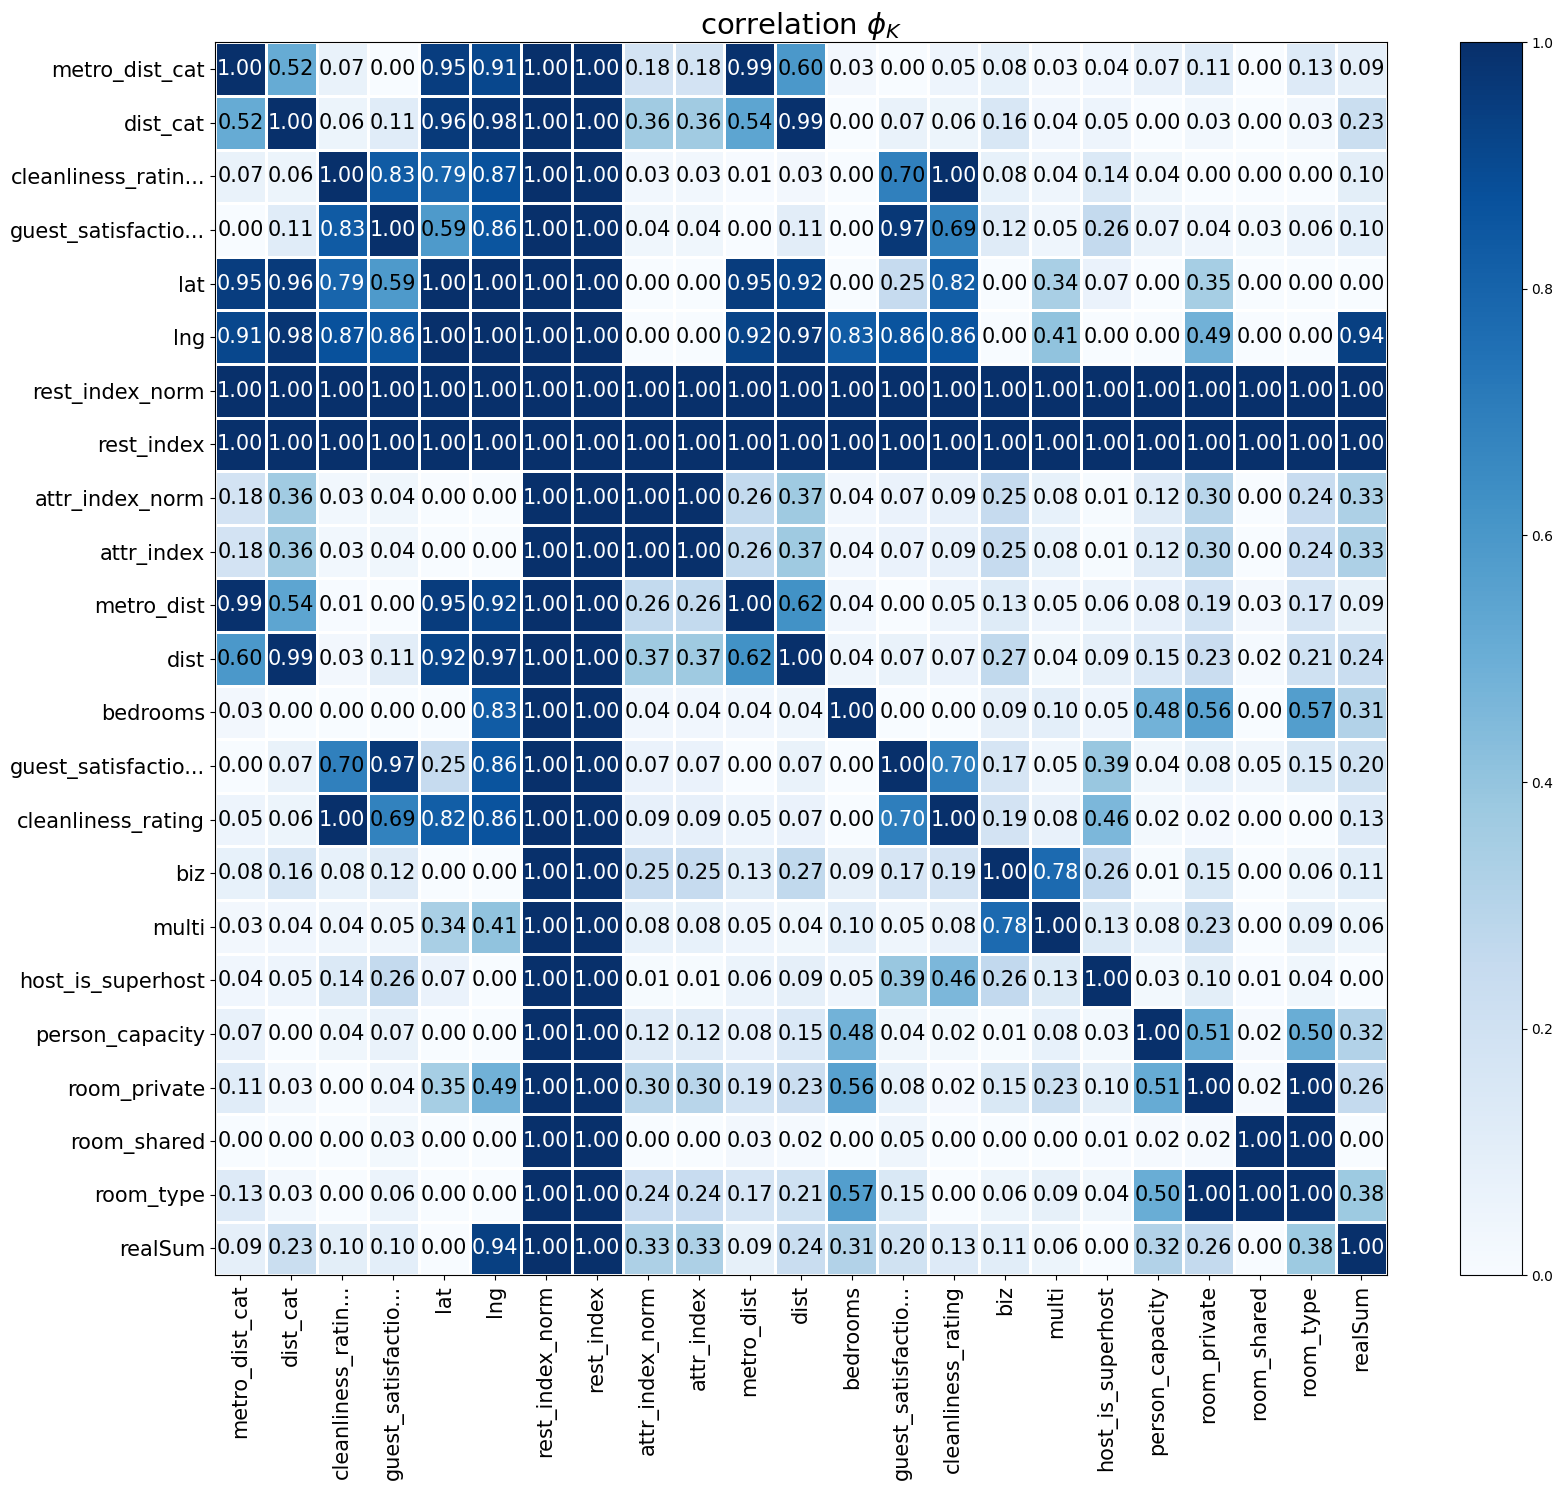

In [105]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(17,15))
plt.tight_layout()

Статистическая значимость корреляции:
Z-score
При оценке корреляций рекомендуется оценивать как корреляцию, так и ее значимость: большая корреляция может быть статистически незначительной, и наоборот, малая корреляция может быть очень значимой. Например, scipy.stats.pearsonr возвращает как корреляцию Пирсона, так и значение p. Аналогичным образом пакет phik предлагает функции расчета матрицы значимости. 

Учитываются несколько поправок к «стандартному» расчету значения p, что делает метод более надежным для случаев с низкой статистикой и разреженными данными. 

In [106]:
significance_overview = df_rm_wends.significance_matrix(interval_cols=interval_cols)
significance_overview

realSum  room_type  room_shared  \
realSum                         69.925200  17.807658     0.493751   
room_type                       17.807658  77.826477     8.678044   
room_shared                      0.493751   8.678044     8.645890   
room_private                    17.892387  77.423181     1.580142   
person_capacity                 22.092272  44.086113     0.258727   
host_is_superhost                0.630748   4.415874     1.383589   
multi                            2.889672   9.481814         -inf   
biz                              6.298626   6.174698     0.832210   
cleanliness_rating               1.781719   0.148416     0.011679   
guest_satisfaction_overall       2.360614   4.383132     1.719310   
bedrooms                        19.102246  29.699881     0.538154   
dist                            19.199932  10.449213     0.888403   
metro_dist                       6.465625   8.563683     1.193011   
attr_index                      27.568393  14.568915     1.113971   
attr_index_norm                 27.550690  14.572879     1.074771   
rest_index                      15.293083  21.599613     0.966493   
rest_index_norm                 15.272160  21.644991     1.001985   
lng                             11.065595  18.064115     0.421439   
lat                              9.070500  15.311929     0.449750   
guest_satisfaction_overall_cat   2.289820   2.822689     0.918683   
cleanliness_rating_cat           1.826752  -0.229402     0.431431   
dist_cat                        18.007008   1.731374    -0.015761   
metro_dist_cat                   6.664957   8.760418     0.627323   

                                room_private  person_capacity  \
realSum                            17.892387        22.092272   
room_type                          77.423181        44.086113   
room_shared                         1.580142         0.258727   
room_private                       77.353968        44.312166   
person_capacity                    44.312166       113.822773   
host_is_superhost                   4.450160         1.510107   
multi                               9.771890         6.108729   
biz                                 6.353797         0.491798   
cleanliness_rating                  0.396806         0.717905   
guest_satisfaction_overall          4.053554         0.670620   
bedrooms                           29.814179        45.823043   
dist                               10.916018         5.573402   
metro_dist                          8.810859         2.669882   
attr_index                         14.616773         8.037384   
attr_index_norm                    14.642994         8.060961   
rest_index                         21.758673        23.587830   
rest_index_norm                    21.720268        23.578012   
lng                                18.194843        16.566318   
lat                                15.429322        14.974632   
guest_satisfaction_overall_cat      2.775797         1.784941   
cleanliness_rating_cat             -0.262313         0.631274   
dist_cat                            2.111146        -1.026981   
metro_dist_cat                      8.994011         2.299913   

                                host_is_superhost      multi        biz  \
realSum                                  0.630748   2.889672   6.298626   
room_type                                4.415874   9.481814   6.174698   
room_shared                              1.383589       -inf   0.832210   
room_private                             4.450160   9.771890   6.353797   
person_capacity                          1.510107   6.108729   0.491798   
host_is_superhost                       75.012047   5.735765  11.747700   
multi                                    5.735765  77.510940  44.106850   
biz                                     11.747700  44.106850  75.953420   
cleanliness_rating                      24.471862   3.038705   8.206359   
guest_satisfaction_overall              28.803529   2.550399  10.3

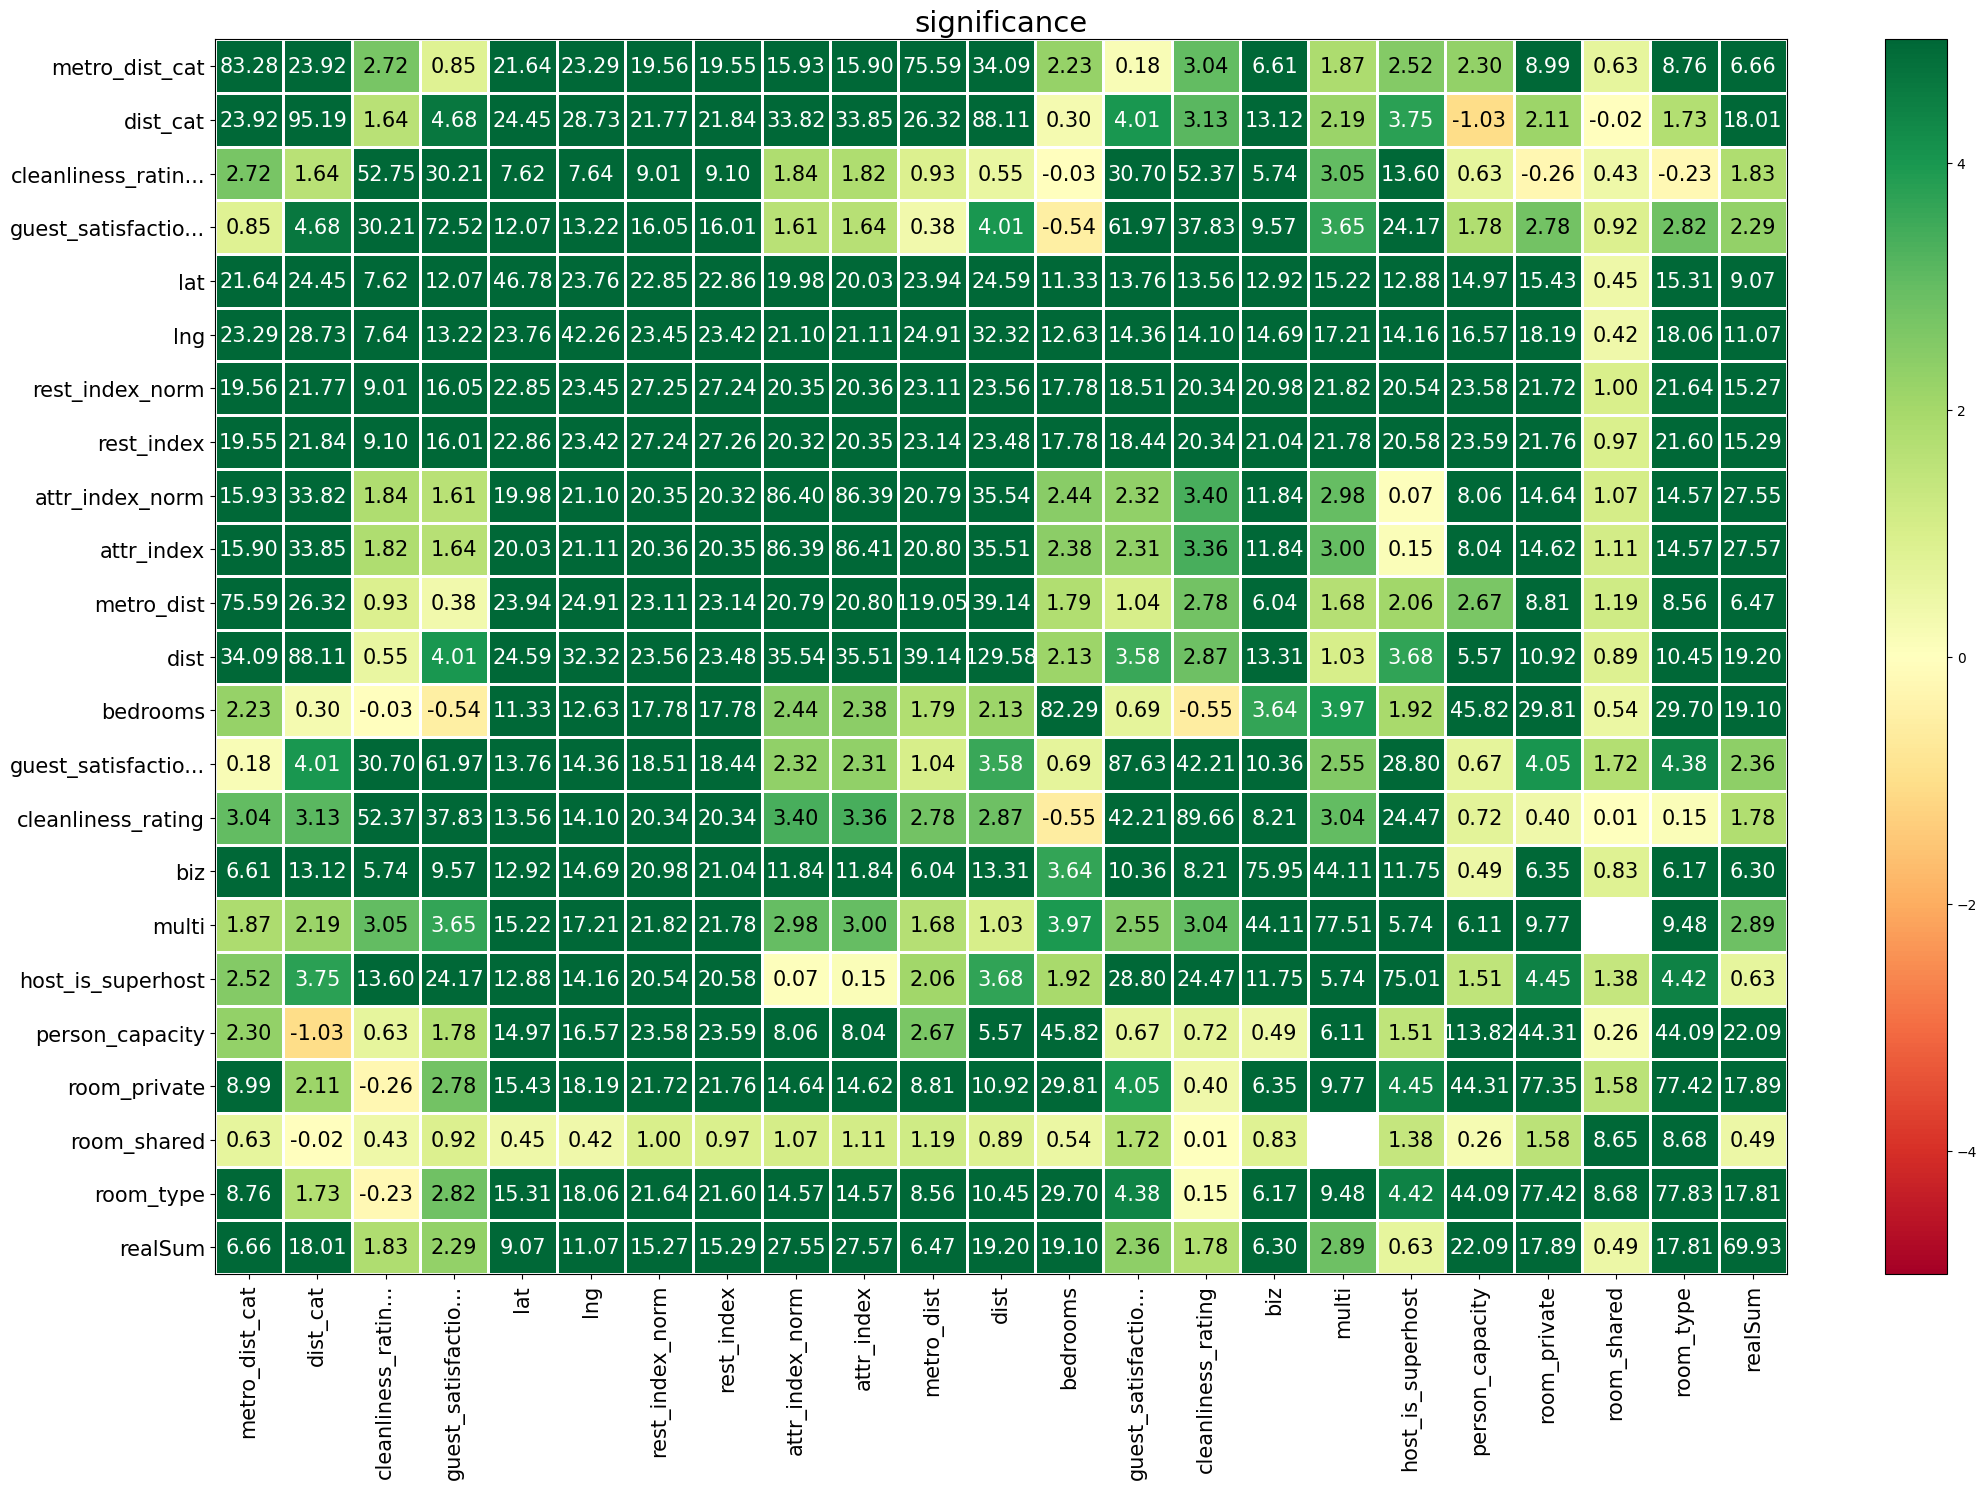

In [107]:
plot_correlation_matrix(significance_overview.fillna(0).values, x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, vmin=-5, vmax=5, title='significance', 
                        usetex=False, fontsize_factor=1.5, figsize=(22,15))
plt.tight_layout()

### Выбросы значимости

Нормальную корреляцию Пирсона между двумя интервальными переменными легко интерпретировать. Однако фик-корреляцию между двумя переменными смешанного типа не всегда легко интерпретировать, особенно когда речь идет о категориальных переменных. Таким образом, предусмотрена функциональность для обнаружения «выбросов»: превышений и дефицитов ожидаемых частот в таблице сопряженности двух переменных.

*Общий рейтинг в зависимости от расстояния от центра города.*\
Для пары категориальных переменных guest_satisfaction_overall_cat - dist_cat мы измерили:\
𝜑_K = 0.11, significance = 4.68\
Давайте воспользуемся функцией значимости выбросов, чтобы лучше понять корреляцию значимости между типом комнтаты/номера и  стоимостью размещения за сутки.

In [108]:
c1 = 'guest_satisfaction_overall_cat'
c0 = 'dist_cat'

In [109]:
outlier_signifs, binning_dict = df_rm_wends[[c0,c1]].outlier_significance_matrix(retbins=True)
outlier_signifs

guest_satisfaction_overall_cat    Низкий  Ниже среднего   Средний  \
dist_cat                                                            
Близко                          0.995383       1.880649  1.667853   
Ближе среднего                 -0.501721      -1.528402 -1.049061   
Средне                         -1.005215      -0.874647 -1.679344   
Дальше среднего                -0.312263      -0.264835  0.658181   
Далеко                         -0.029295      -0.024409 -0.212659   

guest_satisfaction_overall_cat  Выше среднего   Высокий  
dist_cat                                                 
Близко                               4.611493 -5.066434  
Ближе среднего                      -3.863465  4.334494  
Средне                              -2.973207  3.639744  
Дальше среднего                      2.597236 -2.703682  
Далеко                              -1.360466  0.247442

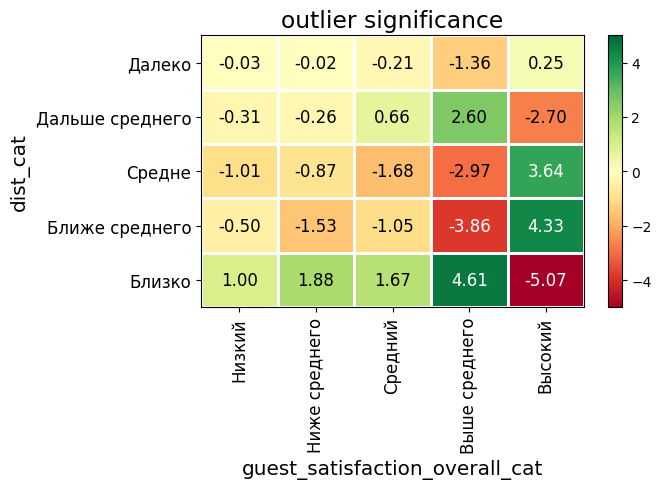

In [110]:
zvalues = outlier_signifs.values
xlabels = binning_dict[c1] if c1 in binning_dict.keys() else outlier_signifs.columns
ylabels = binning_dict[c0] if c0 in binning_dict.keys() else outlier_signifs.index
xlabel = c1
ylabel = c0

plot_correlation_matrix(zvalues, x_labels=xlabels, y_labels=ylabels, 
                        x_label=xlabel,y_label=ylabel,
                        vmin=-5, vmax=5, title='outlier significance',
                        identity_layout=False, fontsize_factor=1.2)

Значимость каждой ячейки выражается через Z (односторонняя).\
Интересно, что у комнат со средним расстоянием от центра высокий рейтинг

*Стоимость размещения за сутки в зависимости от типа комнаты или номер.*\
Для пары категориальных переменных realSum - room_type мы измерили:\
𝜑_K = 0.38, significance = 17.81\
Давайте воспользуемся функцией значимости выбросов, чтобы лучше понять корреляцию значимости между типом комнтаты/номера и  стоимостью размещения за сутки.

Действительно, между этими переменными существует корреляция, и корреляция также значительна. Чтобы лучше понять корреляцию, мы можем взглянуть на значимость избытков и дефицитов в двумерной таблице непредвиденных обстоятельств, так называемых «выбросов значимости».

Значения, отображаемые в матрице, представляют собой значения частот выбросов, т. е. большое значение означает, что измеренная частота для этого интервала значительно отличается от ожидаемой частоты в этом интервале.

Можно визуализировать для облегчения интерпретации.

In [111]:
c0 = 'realSum'
c1 = 'room_type'

tmp_interval_cols = ['realSum']

In [112]:
outlier_signifs, binning_dict = df_rm_wends[[c0,c1]].outlier_significance_matrix(interval_cols=tmp_interval_cols, 
                                                                          retbins=True)
outlier_signifs

room_type      Entire home/apt  Private room  Shared room
46.1_272.6           -8.209536     20.938700    -0.421738
272.6_499.2          17.807966     -8.209536    -0.942407
499.2_725.8           6.551639     -6.618287    -0.111730
725.8_952.3           1.242202     -1.599653    -0.014586
952.3_1178.9          0.477153     -1.687961    -0.007998
1178.9_1405.5         0.475964     -0.921346    -0.009648
1405.5_1632.0        -0.722002     -0.870043    -0.003039
1858.6_2085.2        -0.722002     -0.870043    -0.003039
2085.2_2311.7        -0.722713      0.076543    -0.004694

Интервальная переменная realSum автоматически распределяется по 9 ячейкам, расположенным равномерно

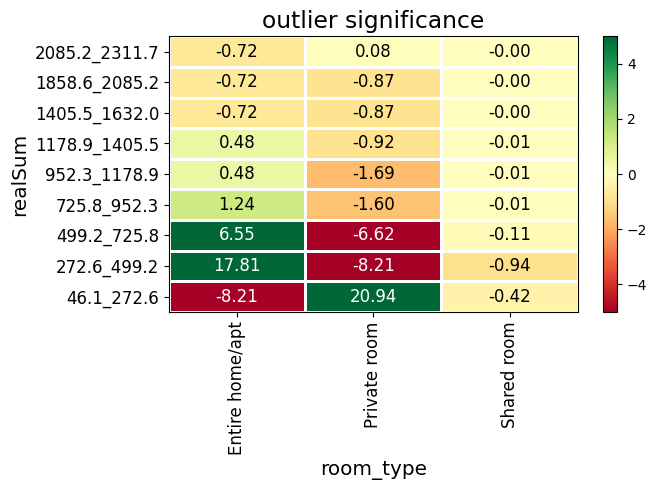

In [113]:
zvalues = outlier_signifs.values
xlabels = outlier_signifs.columns
ylabels = outlier_signifs.index
xlabel = c1
ylabel = c0

plot_correlation_matrix(zvalues, x_labels=xlabels, y_labels=ylabels, 
                        x_label=xlabel,y_label=ylabel,
                        vmin=-5, vmax=5, title='outlier significance',
                        identity_layout=False, fontsize_factor=1.2)

## Выводы

Выявили следующие зависимости:
1. realSum — Стоимость размещения за сутки от:
- room_type — Тип комнаты или номера: цена выше для Entire home/apt, чем для Private room
- guest_satisfaction_overall — Общий рейтинг: слабая положительная связь
- host_is_superhost — Суперхост ли хозяин: Медианная цена для суперхоста выше, чем для не суперхоста.

Т.о. можно выбирать Private room и не суперхоста, чтобы сэкономить.

2. person_capacity — Максимальное кол-во постояльцев от:
- room_shared — Есть комнаты совместного проживания: слабая положительная связь
- room_private — Есть частные комнаты: умеренная отрицательная связь
- bedrooms — Количество спален: умеренная положительная связь

Т.о. чтобы жить с меньшим количеством соседей, надо выбирать номера с меньшим количеством спален и где нет комнат совместного проживания.

3. guest_satisfaction_overall — Общий рейтинг от:
- dist — Расстояние от центра города: слабая положительная связь, что конечно странно
- metro_dist — Расстояние до ближайшей станции метро: слабая отрицательная связь
- realSum — Стоимость размещения за сутки: слабая положительная связь
- cleanliness_rating — Рейтинг чистоты: умеренная положительная связь

Т.о. если хотим номер с хорошим рейтингом, то нужно выбирать ближе к центру, к метро, но и цена будет выше, а также высокий рейтинг чистоты.